# Import Libaries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

import warnings
warnings.filterwarnings("ignore")

# Importing Data

In [5]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Asq Six Question to yourself

In [7]:
crop.shape

(2200, 8)

In [8]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
crop.duplicated().sum()

0

In [11]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [12]:
crop.rename(columns = {"N":"Nitrogen", "P":"Phosphorous","K":"Potassium"}, inplace  = True)

In [13]:
crop.sample(10)

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall,label
407,38,55,19,33.181842,38.231847,5.864623,198.829881,pigeonpeas
912,36,7,37,19.867118,86.355902,5.782436,108.316886,pomegranate
714,51,56,18,28.127878,64.209777,6.706506,70.863408,blackgram
1816,31,20,26,25.565678,97.613615,6.443169,199.793634,coconut
943,38,21,35,20.336911,89.380038,5.841367,110.965314,pomegranate
2045,75,41,35,24.970426,78.626977,6.856833,166.641525,jute
1246,4,134,200,28.578288,80.956290,5.840256,73.342321,grapes
645,2,39,15,28.072196,82.911647,6.478557,49.618653,mungbean
1572,10,136,204,21.198522,92.155951,6.276199,105.855435,apple
1429,116,25,50,29.260928,92.923677,6.088886,28.706277,muskmelon


In [14]:
crop

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## Univariate Analysis


### Nitrogen

--------------------Value Counts--------------------

Nitrogen
22     44
40     44
27     42
39     41
31     41
       ..
136     2
139     1
135     1
130     1
46      1
Name: count, Length: 137, dtype: int64

--------------------Percentage Counts--------------------

Nitrogen
22     2.000000
40     2.000000
27     1.909091
39     1.863636
31     1.863636
         ...   
136    0.090909
139    0.045455
135    0.045455
130    0.045455
46     0.045455
Name: proportion, Length: 137, dtype: float64

--------------------Number of Unique Entries--------------------

137

--------------------Statistical Summary--------------------

count    2200.000000
mean       50.551818
std        36.917334
min         0.000000
25%        21.000000
50%        37.000000
75%        84.250000
max       140.000000
Name: Nitrogen, dtype: float64

------------------------------------Skewness---------------------------------

0.5097213691539147

--------------------Bar Plot-------------------------



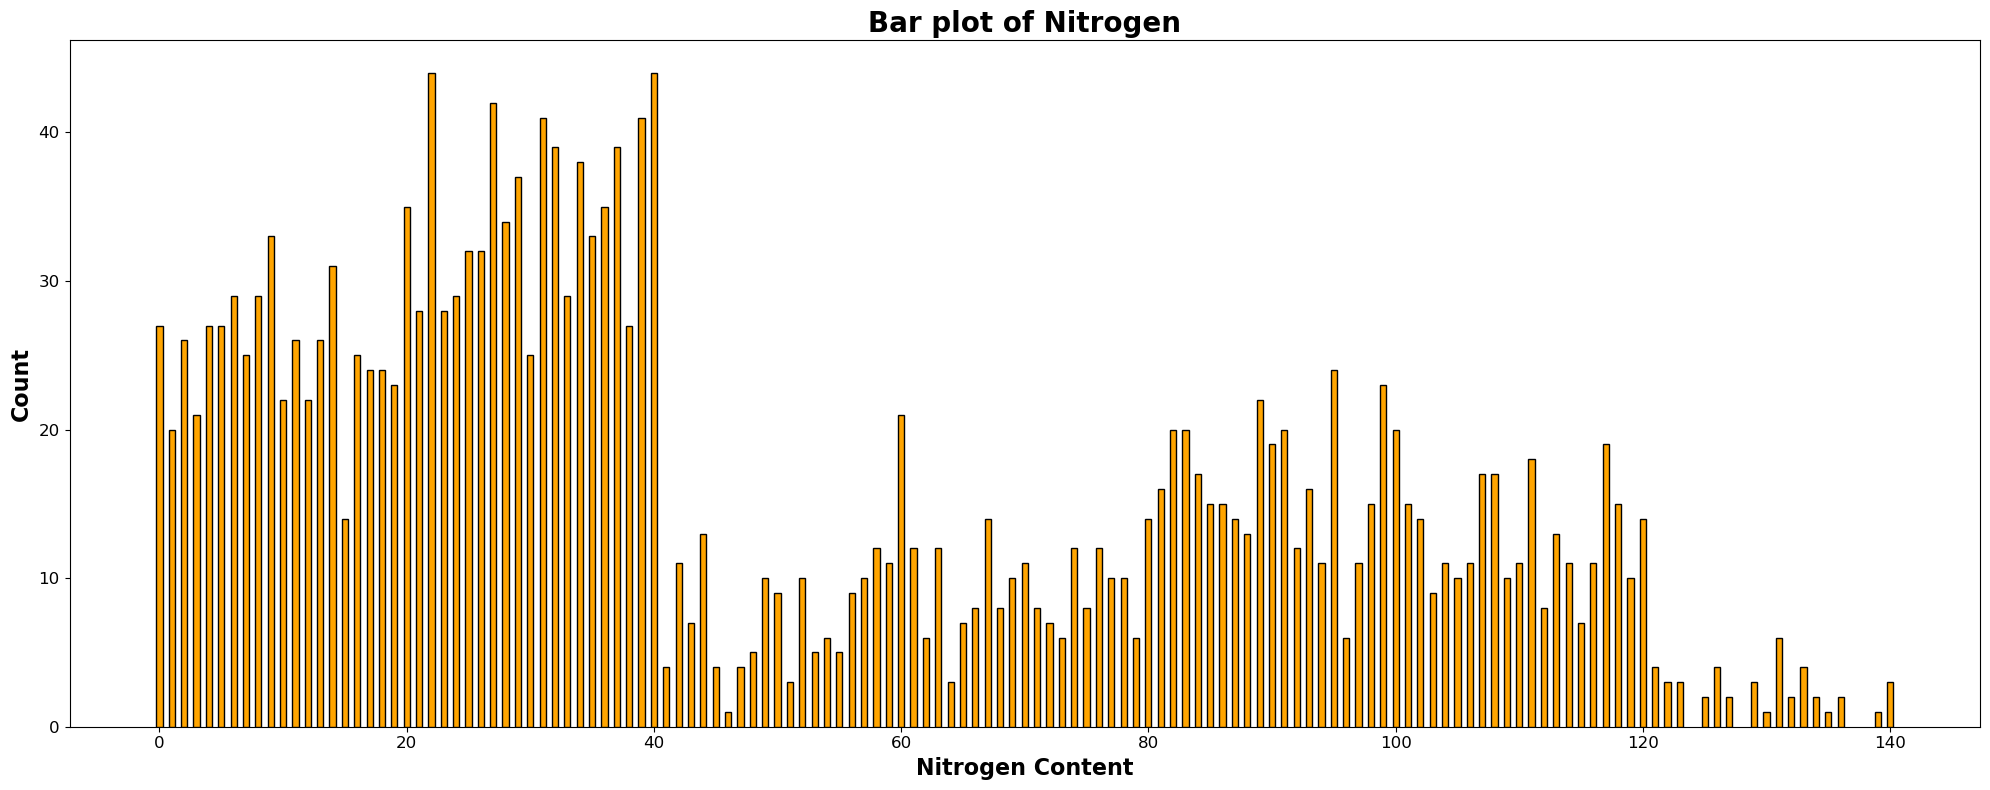


--------------------Hist Plot----------------------



[]

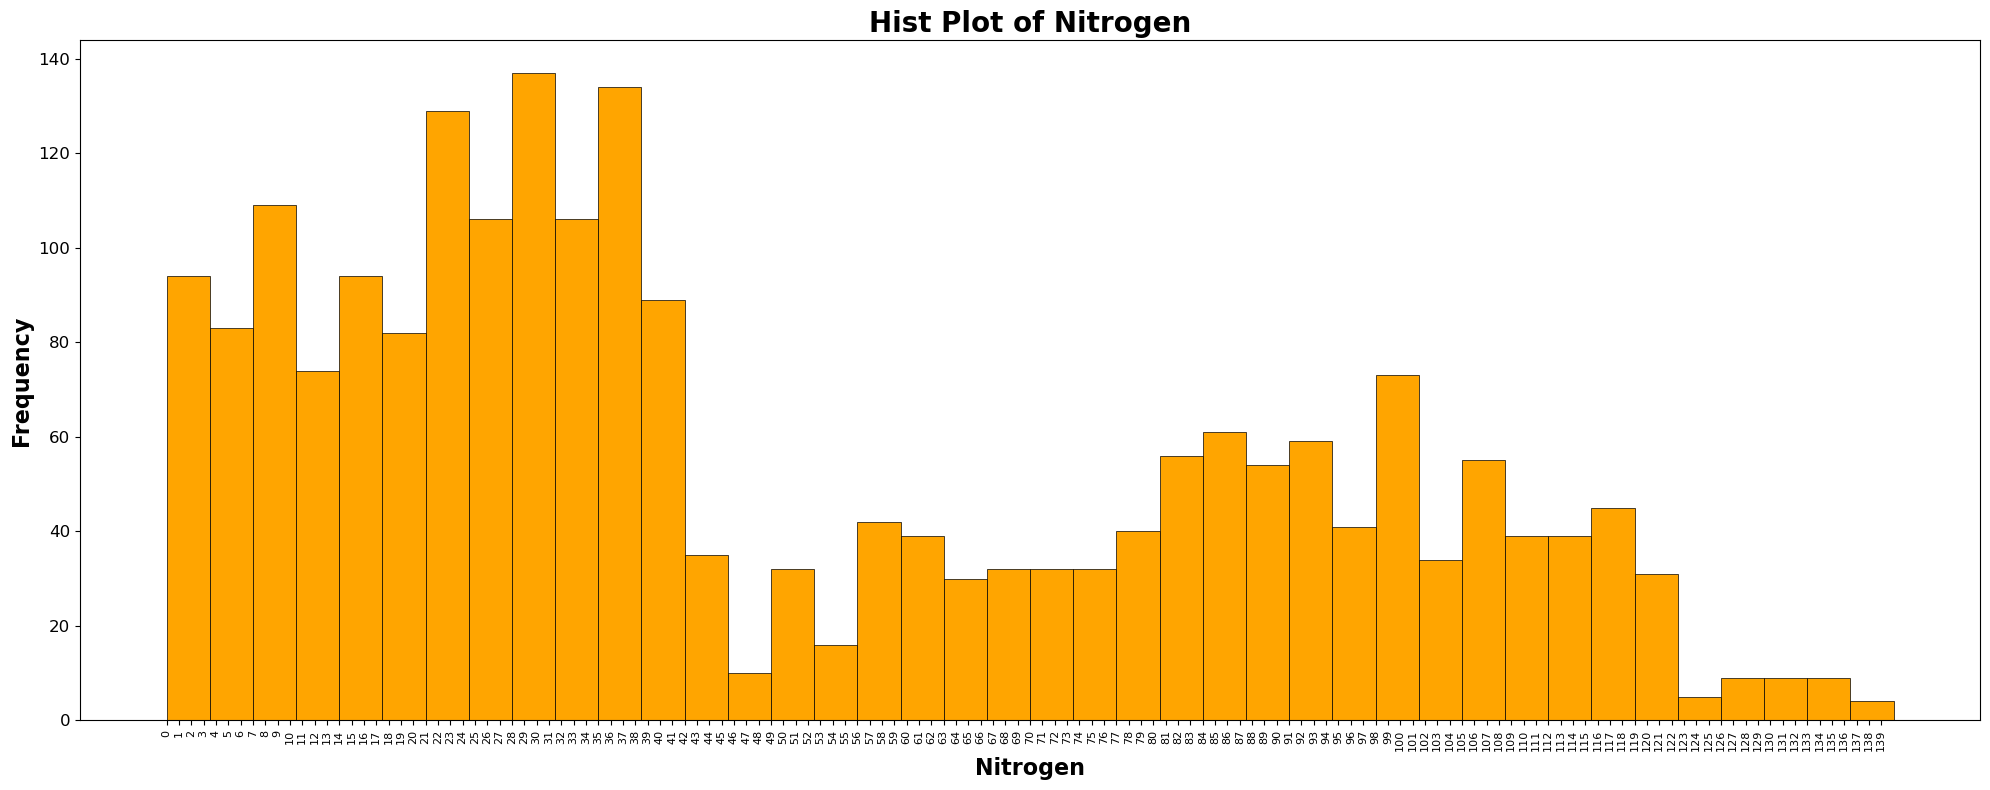

In [17]:
print("--------------------Value Counts--------------------\n")
print(crop["Nitrogen"].value_counts())

print("\n--------------------Percentage Counts--------------------\n")
print(crop["Nitrogen"].value_counts(normalize = True) * 100)

print("\n--------------------Number of Unique Entries--------------------\n")
print(crop["Nitrogen"].nunique())

print("\n--------------------Statistical Summary--------------------\n")
print(crop["Nitrogen"].describe())

print("\n------------------------------------Skewness---------------------------------\n")
print(crop["Nitrogen"].skew())

print("\n--------------------Bar Plot-------------------------\n")
plt.figure(figsize = (20, 8), dpi = 100, facecolor = "white", edgecolor = "black")
plt.bar(
    crop["Nitrogen"].value_counts().index, crop["Nitrogen"].value_counts().values,
    color = "orange",
    width = 0.5,
    align = "center",
    edgecolor = "black",
    zorder = 3
)
plt.title("Bar plot of Nitrogen", fontsize = 20, color = "black", loc = "center", fontweight = "bold")
plt.xlabel("Nitrogen Content", fontweight = "bold", fontsize = 16)
plt.ylabel("Count", fontweight = "bold", fontsize = 16)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12, rotation = 0)
plt.xlim()
plt.tight_layout()
plt.show()

print("\n--------------------Hist Plot----------------------\n")
plt.figure(figsize = (20, 8), dpi = 100, facecolor = "white", edgecolor = "black")
plt.hist(
    crop["Nitrogen"],
    bins = 40,
    align = "mid",
    orientation = "vertical",
    color = "orange",
    edgecolor = "black",
    linewidth = 0.5
)
plt.title("Hist Plot of Nitrogen", fontsize = 20, fontweight = "bold", loc = "center", color = "black")
plt.xlabel("Nitrogen", fontsize = 16, fontweight = "bold", color = "black")
plt.ylabel("Frequency", fontsize = 16, fontweight = "bold", color = "black")
plt.xticks([x for x in range(crop["Nitrogen"].min(), crop["Nitrogen"].max())],rotation = 90, fontsize = 8)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.plot()

## Phosphorous

--------------------Value Counts--------------------

Phosphorous
60    56
58    48
56    46
55    44
57    42
      ..
83     2
82     2
90     2
93     1
84     1
Name: count, Length: 117, dtype: int64

--------------------Percentage Counts--------------------

Phosphorous
60    2.545455
58    2.181818
56    2.090909
55    2.000000
57    1.909091
        ...   
83    0.090909
82    0.090909
90    0.090909
93    0.045455
84    0.045455
Name: proportion, Length: 117, dtype: float64

--------------------Number of Unique Entries--------------------

117

--------------------Statistical Summary--------------------

count    2200.000000
mean       53.362727
std        32.985883
min         5.000000
25%        28.000000
50%        51.000000
75%        68.000000
max       145.000000
Name: Phosphorous, dtype: float64

------------------------------------Skewness---------------------------------

1.0107725431372674

--------------------Bar Plot-------------------------



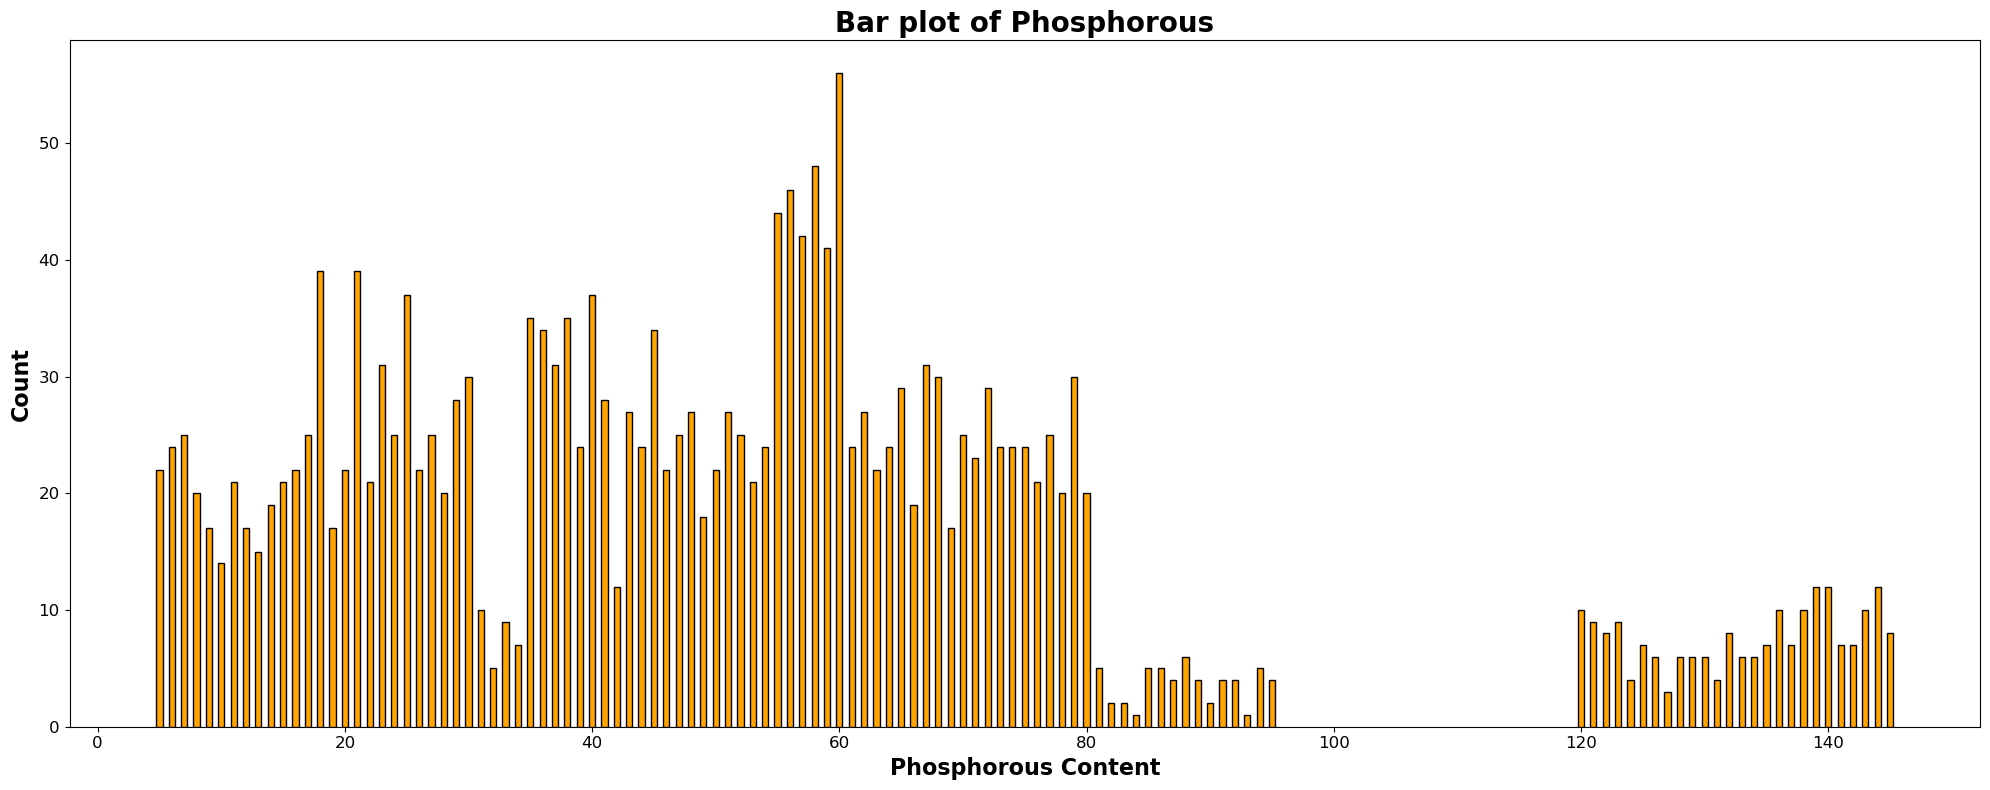


--------------------Hist Plot----------------------



[]

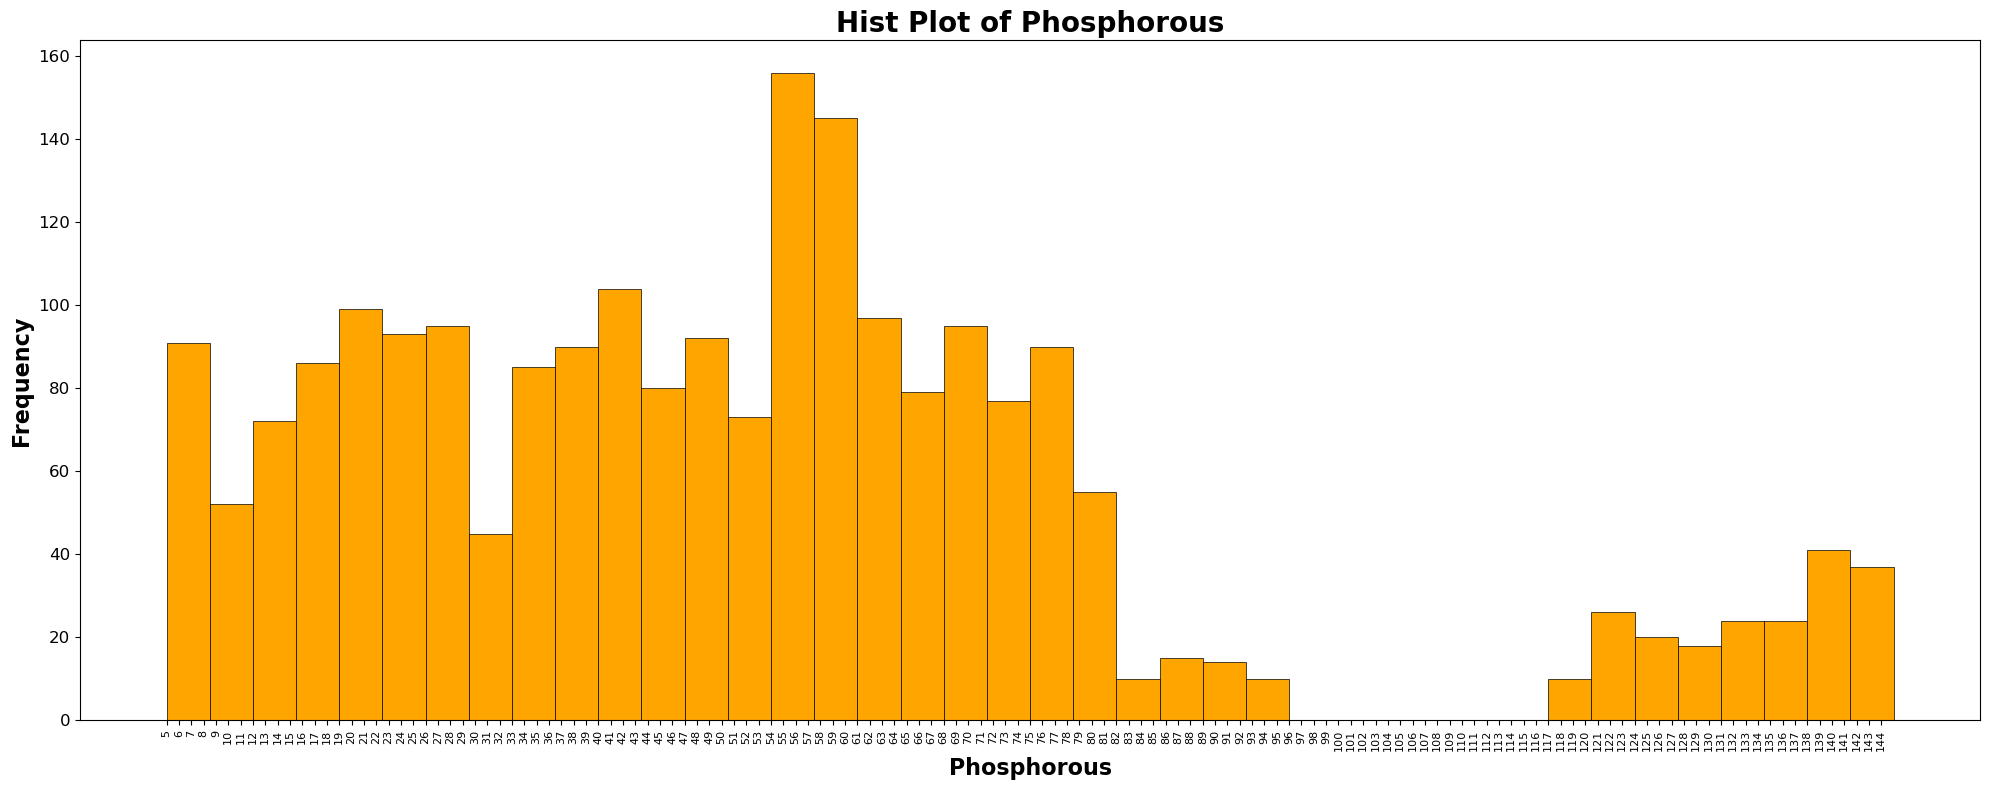

In [19]:
print("--------------------Value Counts--------------------\n")
print(crop["Phosphorous"].value_counts())

print("\n--------------------Percentage Counts--------------------\n")
print(crop["Phosphorous"].value_counts(normalize = True) * 100)

print("\n--------------------Number of Unique Entries--------------------\n")
print(crop["Phosphorous"].nunique())

print("\n--------------------Statistical Summary--------------------\n")
print(crop["Phosphorous"].describe())

print("\n------------------------------------Skewness---------------------------------\n")
print(crop["Phosphorous"].skew())

print("\n--------------------Bar Plot-------------------------\n")
plt.figure(figsize = (20, 8), dpi = 100, facecolor = "white", edgecolor = "black")
plt.bar(
    crop["Phosphorous"].value_counts().index, crop["Phosphorous"].value_counts().values,
    color = "orange",
    width = 0.5,
    align = "center",
    edgecolor = "black",
    zorder = 3
)
plt.title("Bar plot of Phosphorous", fontsize = 20, color = "black", loc = "center", fontweight = "bold")
plt.xlabel("Phosphorous Content", fontweight = "bold", fontsize = 16)
plt.ylabel("Count", fontweight = "bold", fontsize = 16)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12, rotation = 0)
plt.xlim()
plt.tight_layout()
plt.show()


print("\n--------------------Hist Plot----------------------\n")
plt.figure(figsize = (20, 8), dpi = 100, facecolor = "white", edgecolor = "black")
plt.hist(
    crop["Phosphorous"],
    bins = 40,
    align = "mid",
    orientation = "vertical",
    color = "orange",
    edgecolor = "black",
    linewidth = 0.5
)
plt.title("Hist Plot of Phosphorous", fontsize = 20, fontweight = "bold", loc = "center", color = "black")
plt.xlabel("Phosphorous", fontsize = 16, fontweight = "bold", color = "black")
plt.ylabel("Frequency", fontsize = 16, fontweight = "bold", color = "black")
plt.xticks([x for x in range(crop["Phosphorous"].min(), crop["Phosphorous"].max())],rotation = 90, fontsize = 8)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.plot()

## Potassium

--------------------Value Counts--------------------

Potassium
17    90
22    87
15    86
20    80
25    78
      ..
5      8
11     8
13     7
7      5
80     4
Name: count, Length: 73, dtype: int64

--------------------Percentage Counts--------------------

Potassium
17    4.090909
22    3.954545
15    3.909091
20    3.636364
25    3.545455
        ...   
5     0.363636
11    0.363636
13    0.318182
7     0.227273
80    0.181818
Name: proportion, Length: 73, dtype: float64

--------------------Number of Unique Entries--------------------

73

--------------------Statistical Summary--------------------

count    2200.000000
mean       48.149091
std        50.647931
min         5.000000
25%        20.000000
50%        32.000000
75%        49.000000
max       205.000000
Name: Potassium, dtype: float64

------------------------------------Skewness---------------------------------

2.3751672388547

--------------------Bar Plot-------------------------



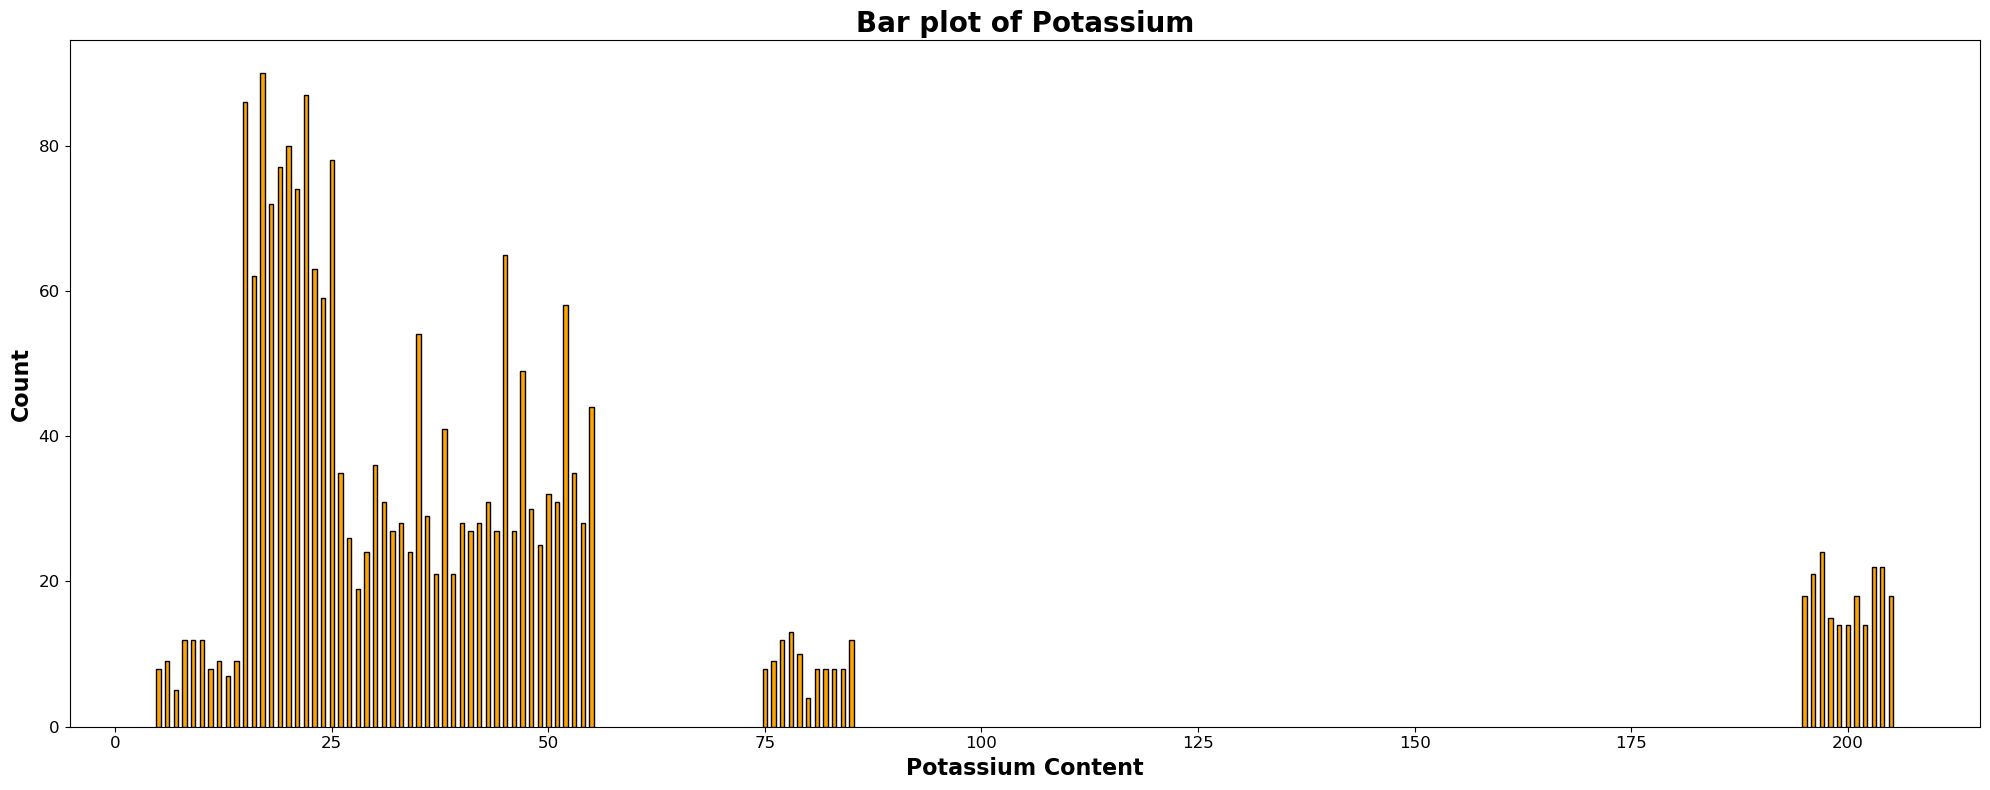


--------------------Hist Plot----------------------



[]

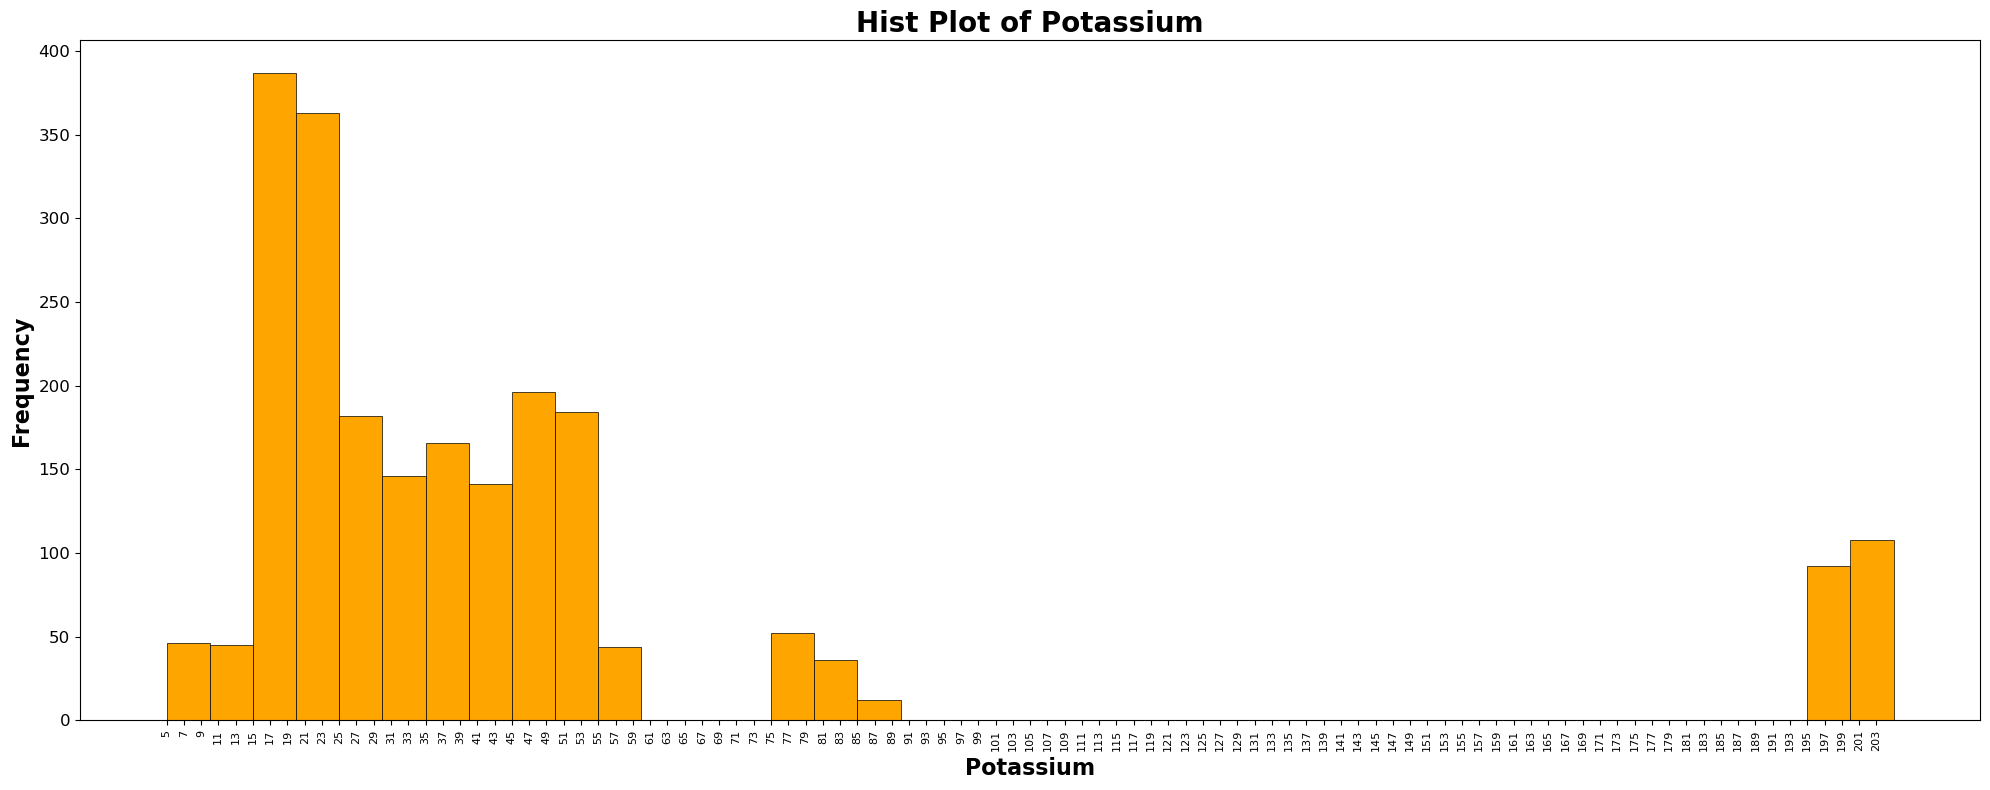

In [21]:
print("--------------------Value Counts--------------------\n")
print(crop["Potassium"].value_counts())

print("\n--------------------Percentage Counts--------------------\n")
print(crop["Potassium"].value_counts(normalize = True) * 100)

print("\n--------------------Number of Unique Entries--------------------\n")
print(crop["Potassium"].nunique())

print("\n--------------------Statistical Summary--------------------\n")
print(crop["Potassium"].describe())

print("\n------------------------------------Skewness---------------------------------\n")
print(crop["Potassium"].skew())

print("\n--------------------Bar Plot-------------------------\n")
plt.figure(figsize = (20, 8), dpi = 100, facecolor = "white", edgecolor = "black")
plt.bar(
    crop["Potassium"].value_counts().index, crop["Potassium"].value_counts().values,
    color = "orange",
    width = 0.5,
    align = "center",
    edgecolor = "black",
    zorder = 3
)
plt.title("Bar plot of Potassium", fontsize = 20, color = "black", loc = "center", fontweight = "bold")
plt.xlabel("Potassium Content", fontweight = "bold", fontsize = 16)
plt.ylabel("Count", fontweight = "bold", fontsize = 16)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12, rotation = 0)
plt.xlim()
plt.tight_layout()
plt.show()


print("\n--------------------Hist Plot----------------------\n")
plt.figure(figsize = (20, 8), dpi = 100, facecolor = "white", edgecolor = "black")
plt.hist(
    crop["Potassium"],
    bins = 40,
    align = "mid",
    orientation = "vertical",
    color = "orange",
    edgecolor = "black",
    linewidth = 0.5
)
plt.title("Hist Plot of Potassium", fontsize = 20, fontweight = "bold", loc = "center", color = "black")
plt.xlabel("Potassium", fontsize = 16, fontweight = "bold", color = "black")
plt.ylabel("Frequency", fontsize = 16, fontweight = "bold", color = "black")
plt.xticks([x for x in range(crop["Potassium"].min(), crop["Potassium"].max(),2)],rotation = 90, fontsize = 8)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.plot()

## Temperature

--------------------Value Counts--------------------

temperature
20.879744    1
29.480699    1
29.943492    1
28.033065    1
29.884305    1
            ..
25.365861    1
28.568406    1
30.284966    1
27.325421    1
23.603016    1
Name: count, Length: 2200, dtype: int64

--------------------Percentage Counts--------------------

temperature
20.879744    0.045455
29.480699    0.045455
29.943492    0.045455
28.033065    0.045455
29.884305    0.045455
               ...   
25.365861    0.045455
28.568406    0.045455
30.284966    0.045455
27.325421    0.045455
23.603016    0.045455
Name: proportion, Length: 2200, dtype: float64

--------------------Number of Unique Entries--------------------

2200

--------------------Statistical Summary--------------------

count    2200.000000
mean       25.616244
std         5.063749
min         8.825675
25%        22.769375
50%        25.598693
75%        28.561654
max        43.675493
Name: temperature, dtype: float64

--------------------Hist Plot--

[]

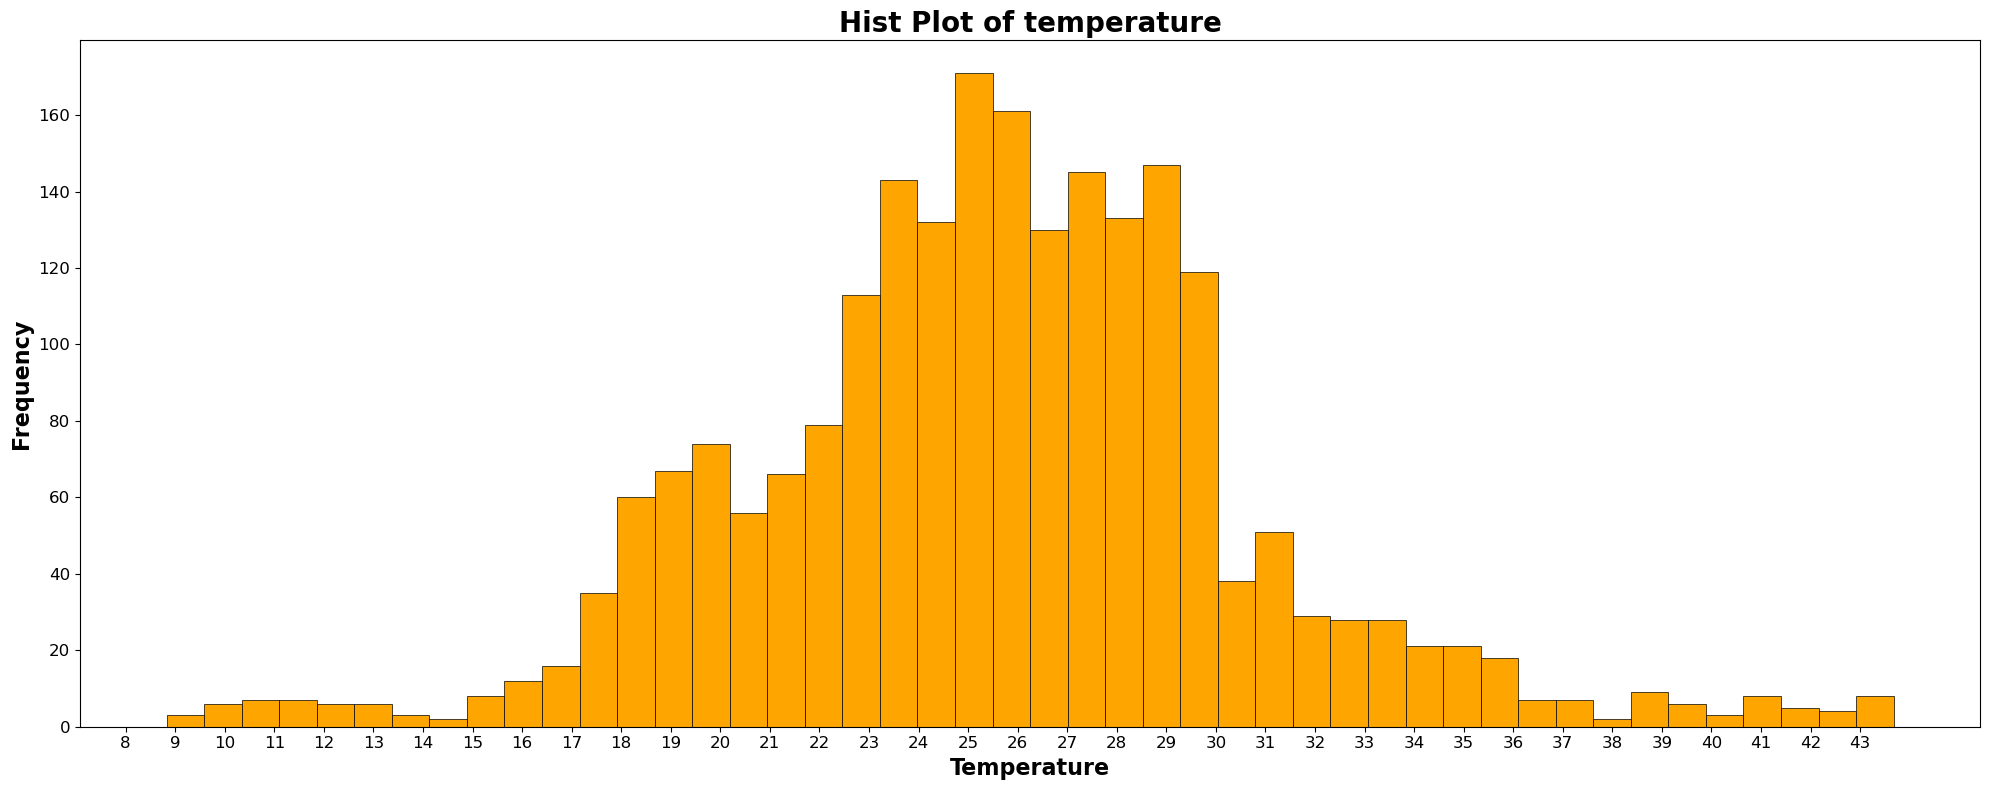

In [23]:
print("--------------------Value Counts--------------------\n")
print(crop["temperature"].value_counts())

print("\n--------------------Percentage Counts--------------------\n")
print(crop["temperature"].value_counts(normalize = True) * 100)

print("\n--------------------Number of Unique Entries--------------------\n")
print(crop["temperature"].nunique())

print("\n--------------------Statistical Summary--------------------\n")
print(crop["temperature"].describe())

print("\n--------------------Hist Plot----------------------\m")
plt.figure(figsize = (20, 8), dpi = 100, facecolor = "white", edgecolor = "black")
plt.hist(
    crop["temperature"],
    bins = int(np.sqrt(crop["temperature"].nunique())),
    align = "mid",
    orientation = "vertical",
    color = "orange",
    edgecolor = "black",
    linewidth = 0.5
)
plt.title("Hist Plot of temperature", fontsize = 20, fontweight = "bold", loc = "center", color = "black")
plt.xlabel("Temperature", fontsize = 16, fontweight = "bold", color = "black")
plt.ylabel("Frequency", fontsize = 16, fontweight = "bold", color = "black")
plt.xticks([x for x in range(int(crop["temperature"].min()), int(crop["temperature"].max()) + 1)],rotation = 0, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.plot()

## Humidity

--------------------Value Counts--------------------

humidity
82.002744    1
90.336987    1
93.907412    1
91.473558    1
94.037115    1
            ..
66.637972    1
61.532786    1
61.692951    1
69.090478    1
60.396475    1
Name: count, Length: 2200, dtype: int64

--------------------Percentage Counts--------------------

humidity
82.002744    0.045455
90.336987    0.045455
93.907412    0.045455
91.473558    0.045455
94.037115    0.045455
               ...   
66.637972    0.045455
61.532786    0.045455
61.692951    0.045455
69.090478    0.045455
60.396475    0.045455
Name: proportion, Length: 2200, dtype: float64

--------------------Number of Unique Entries--------------------

2200

--------------------Statistical Summary--------------------

count    2200.000000
mean       71.481779
std        22.263812
min        14.258040
25%        60.261953
50%        80.473146
75%        89.948771
max        99.981876
Name: humidity, dtype: float64

--------------------Hist Plot-----------

[]

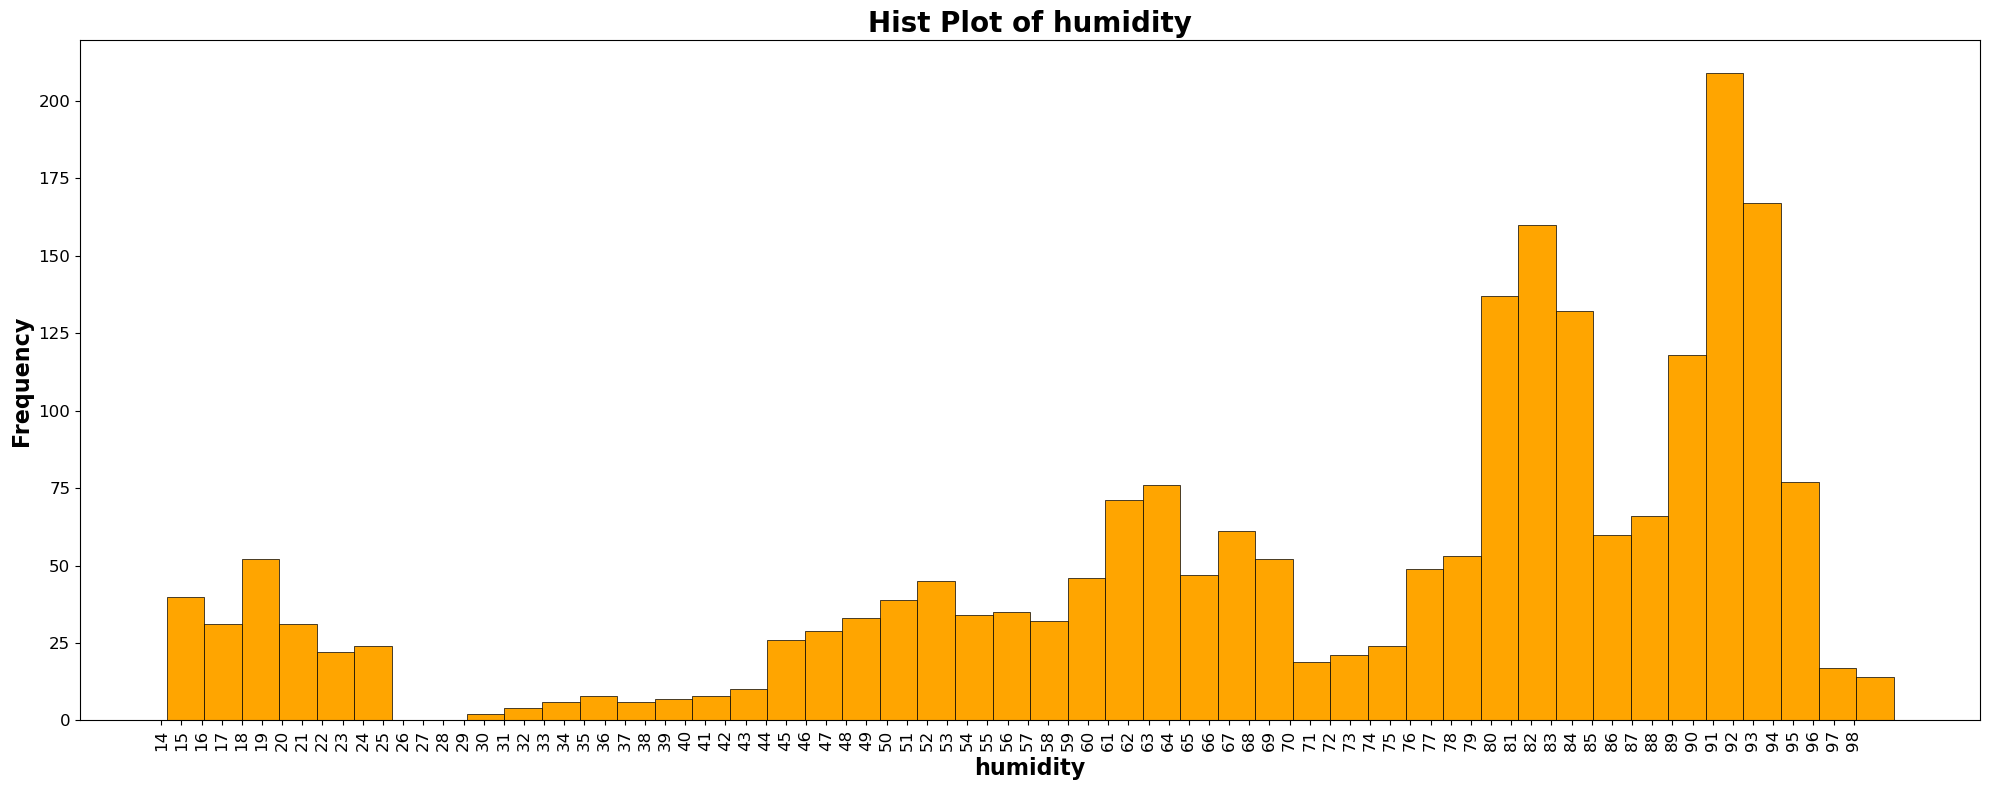

In [25]:
print("--------------------Value Counts--------------------\n")
print(crop["humidity"].value_counts())

print("\n--------------------Percentage Counts--------------------\n")
print(crop["humidity"].value_counts(normalize = True) * 100)

print("\n--------------------Number of Unique Entries--------------------\n")
print(crop["humidity"].nunique())

print("\n--------------------Statistical Summary--------------------\n")
print(crop["humidity"].describe())

print("\n--------------------Hist Plot----------------------\m")
plt.figure(figsize = (20, 8), dpi = 100, facecolor = "white", edgecolor = "black")
plt.hist(
    crop["humidity"],
    bins = int(np.sqrt(crop["humidity"].nunique())),
    align = "mid",
    orientation = "vertical",
    color = "orange",
    edgecolor = "black",
    linewidth = 0.5
)
plt.title("Hist Plot of humidity", fontsize = 20, fontweight = "bold", loc = "center", color = "black")
plt.xlabel("humidity", fontsize = 16, fontweight = "bold", color = "black")
plt.ylabel("Frequency", fontsize = 16, fontweight = "bold", color = "black")
plt.xticks([x for x in range(int(crop["humidity"].min()), int(crop["humidity"].max()))],rotation = 90, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.plot()

## pH

--------------------Value Counts--------------------

ph
6.502985    1
6.640471    1
6.251420    1
6.274453    1
6.135996    1
           ..
7.538631    1
7.127064    1
6.628265    1
6.726469    1
6.779833    1
Name: count, Length: 2200, dtype: int64

--------------------Percentage Counts--------------------

ph
6.502985    0.045455
6.640471    0.045455
6.251420    0.045455
6.274453    0.045455
6.135996    0.045455
              ...   
7.538631    0.045455
7.127064    0.045455
6.628265    0.045455
6.726469    0.045455
6.779833    0.045455
Name: proportion, Length: 2200, dtype: float64

--------------------Number of Unique Entries--------------------

2200

--------------------Statistical Summary--------------------

count    2200.000000
mean        6.469480
std         0.773938
min         3.504752
25%         5.971693
50%         6.425045
75%         6.923643
max         9.935091
Name: ph, dtype: float64

--------------------Hist Plot----------------------\m


[]

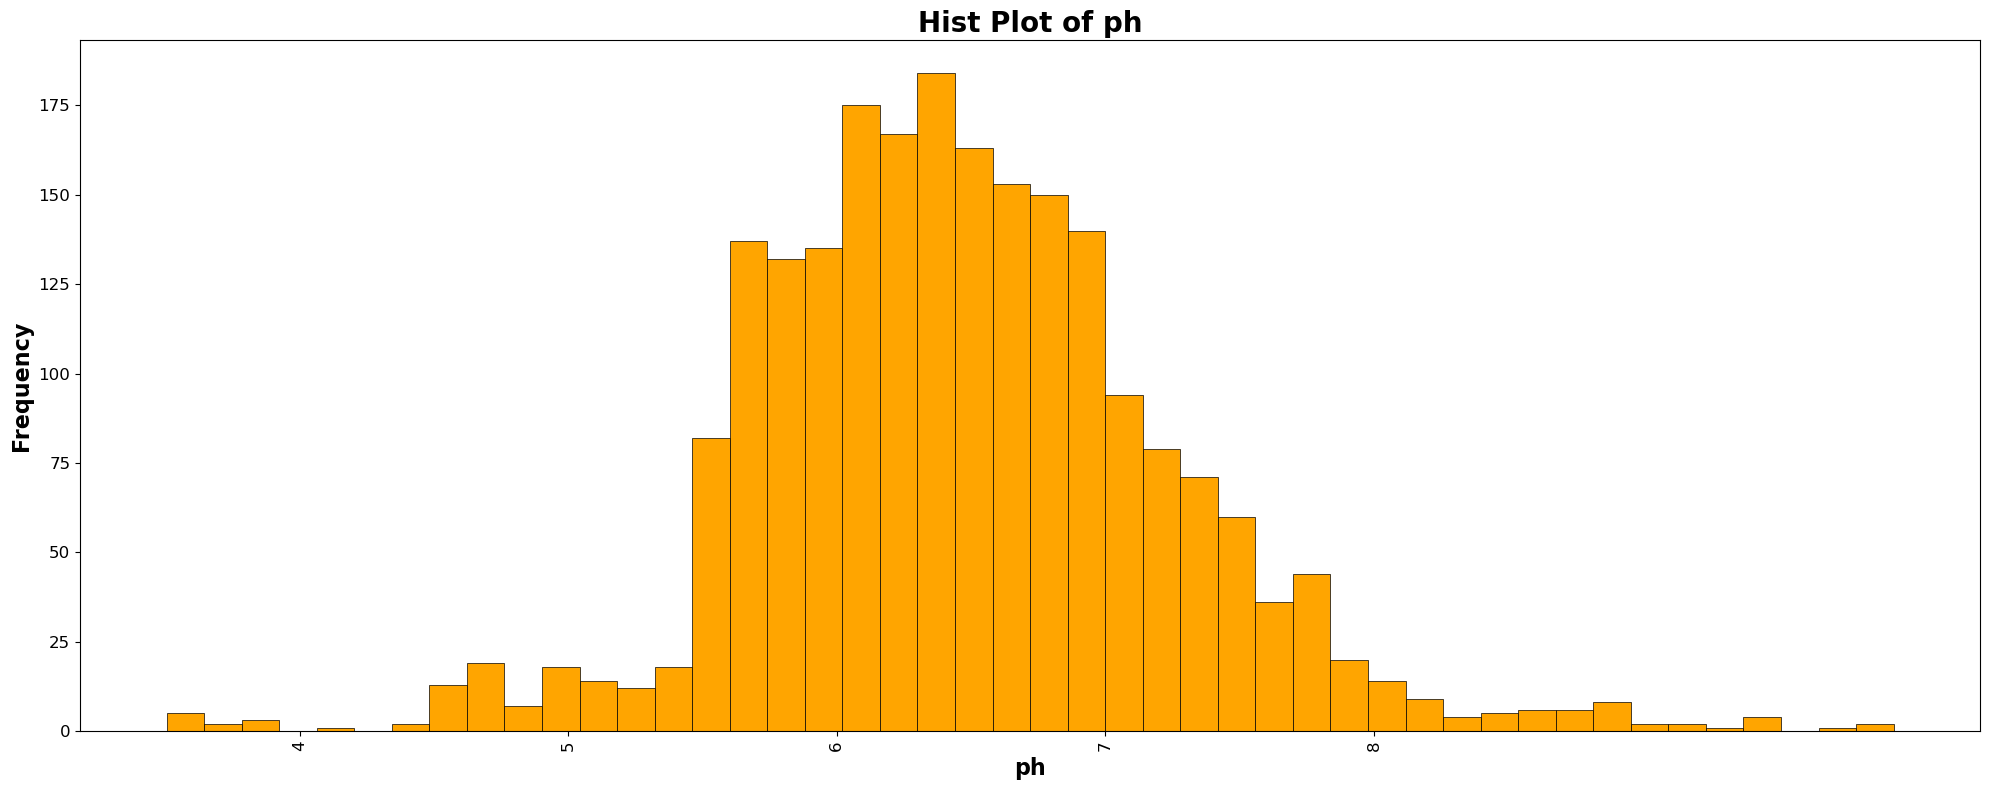

In [27]:
print("--------------------Value Counts--------------------\n")
print(crop["ph"].value_counts())

print("\n--------------------Percentage Counts--------------------\n")
print(crop["ph"].value_counts(normalize = True) * 100)

print("\n--------------------Number of Unique Entries--------------------\n")
print(crop["ph"].nunique())

print("\n--------------------Statistical Summary--------------------\n")
print(crop["ph"].describe())

print("\n--------------------Hist Plot----------------------\m")
plt.figure(figsize = (20, 8), dpi = 100, facecolor = "white", edgecolor = "black")
plt.hist(
    crop["ph"],
    bins = int(np.sqrt(crop["ph"].nunique())),
    align = "mid",
    orientation = "vertical",
    color = "orange",
    edgecolor = "black",
    linewidth = 0.5
)
plt.title("Hist Plot of ph", fontsize = 20, fontweight = "bold", loc = "center", color = "black")
plt.xlabel("ph", fontsize = 16, fontweight = "bold", color = "black")
plt.ylabel("Frequency", fontsize = 16, fontweight = "bold", color = "black")
plt.xticks([x for x in range(int(crop["ph"].min()), int(crop["ph"].max()))],rotation = 90, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.plot()

## Rainfall

--------------------Value Counts--------------------

rainfall
202.935536    1
26.036577     1
20.390205     1
21.179248     1
21.000099     1
             ..
65.816559     1
63.497263     1
65.628595     1
61.192509     1
140.937041    1
Name: count, Length: 2200, dtype: int64

--------------------Percentage Counts--------------------

rainfall
202.935536    0.045455
26.036577     0.045455
20.390205     0.045455
21.179248     0.045455
21.000099     0.045455
                ...   
65.816559     0.045455
63.497263     0.045455
65.628595     0.045455
61.192509     0.045455
140.937041    0.045455
Name: proportion, Length: 2200, dtype: float64

--------------------Number of Unique Entries--------------------

2200

--------------------Statistical Summary--------------------

count    2200.000000
mean      103.463655
std        54.958389
min        20.211267
25%        64.551686
50%        94.867624
75%       124.267508
max       298.560117
Name: rainfall, dtype: float64

------------------

[]

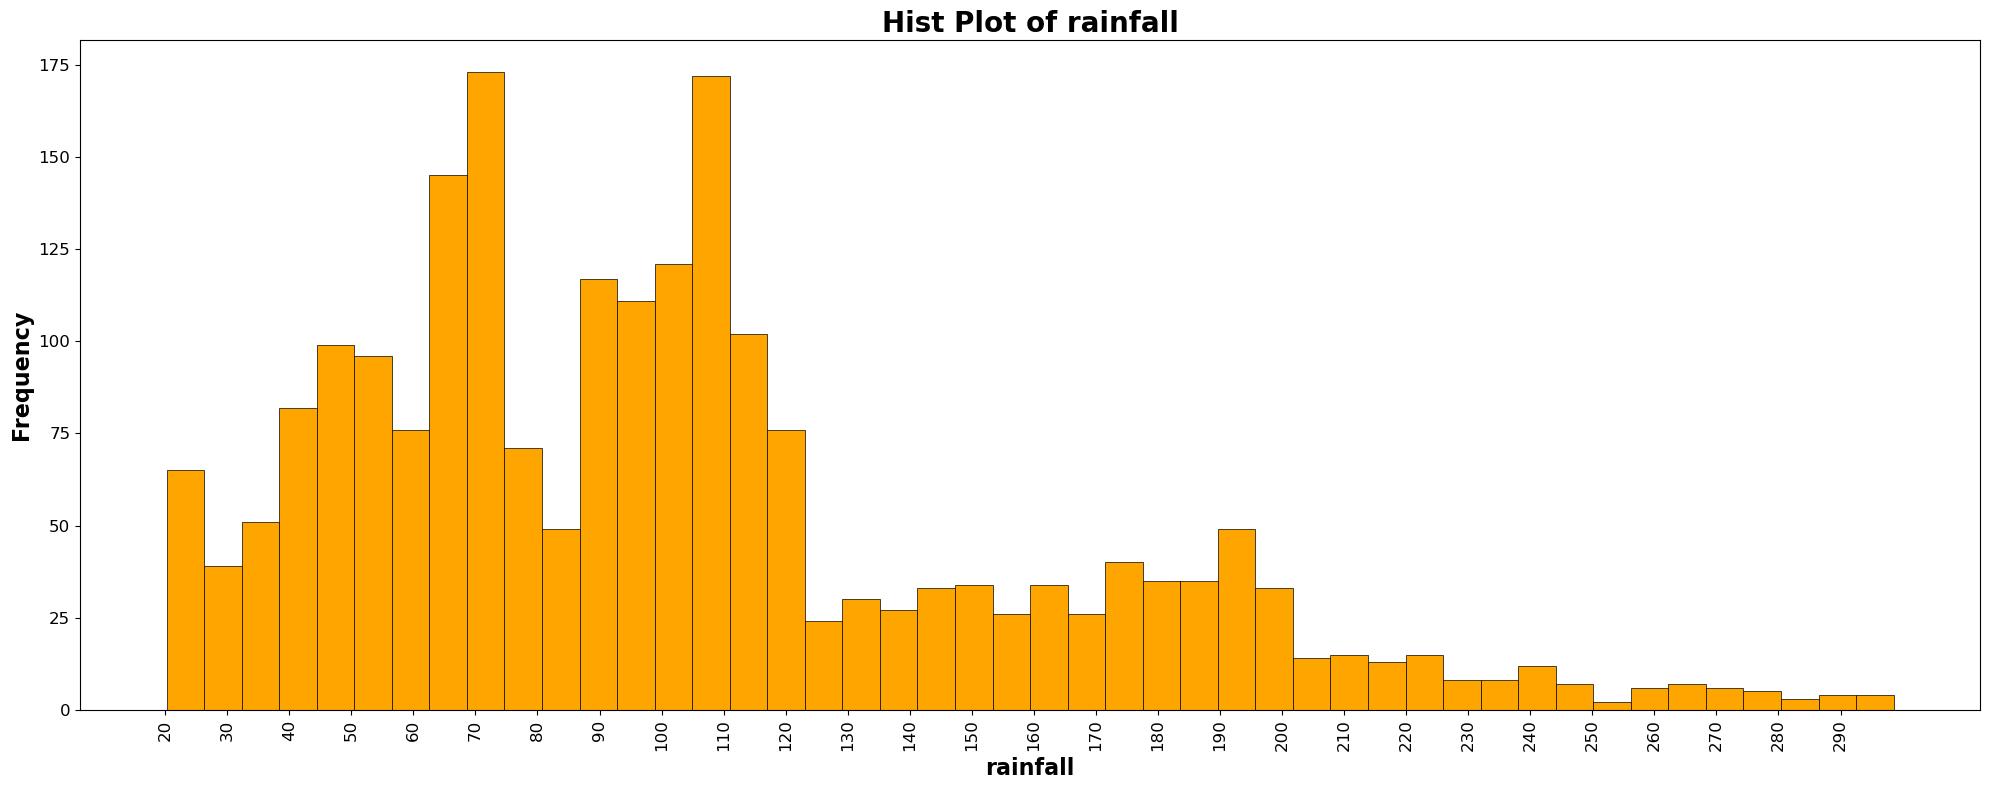

In [29]:
print("--------------------Value Counts--------------------\n")
print(crop["rainfall"].value_counts())

print("\n--------------------Percentage Counts--------------------\n")
print(crop["rainfall"].value_counts(normalize = True) * 100)

print("\n--------------------Number of Unique Entries--------------------\n")
print(crop["rainfall"].nunique())

print("\n--------------------Statistical Summary--------------------\n")
print(crop["rainfall"].describe())

print("\n--------------------Hist Plot----------------------\m")
plt.figure(figsize = (20, 8), dpi = 100, facecolor = "white", edgecolor = "black")
plt.hist(
    crop["rainfall"],
    bins = int(np.sqrt(crop["ph"].nunique())),
    align = "mid",
    orientation = "vertical",
    color = "orange",
    edgecolor = "black",
    linewidth = 0.5
)
plt.title("Hist Plot of rainfall", fontsize = 20, fontweight = "bold", loc = "center", color = "black")
plt.xlabel("rainfall", fontsize = 16, fontweight = "bold", color = "black")
plt.ylabel("Frequency", fontsize = 16, fontweight = "bold", color = "black")
plt.xticks([x for x in range(int(crop["rainfall"].min()), int(crop["rainfall"].max()), 10)],rotation = 90, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.plot()

## Label

--------------------Value Counts--------------------

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

--------------------Percentage Counts--------------------

label
rice           4.545455
maize          4.545455
jute           4.545455
cotton         4.545455
coconut        4.545455
papaya         4.545455
orange         4.545455
apple          4.545455
muskmelon      4.545455
watermelon     4.545455
grapes         4.545455
mango          4.545455
banana         4.545455
pomegranate    4.545455
lentil         4.545455
blackgram      4.545455
mungbean       4.545455
mothbeans      4.54545

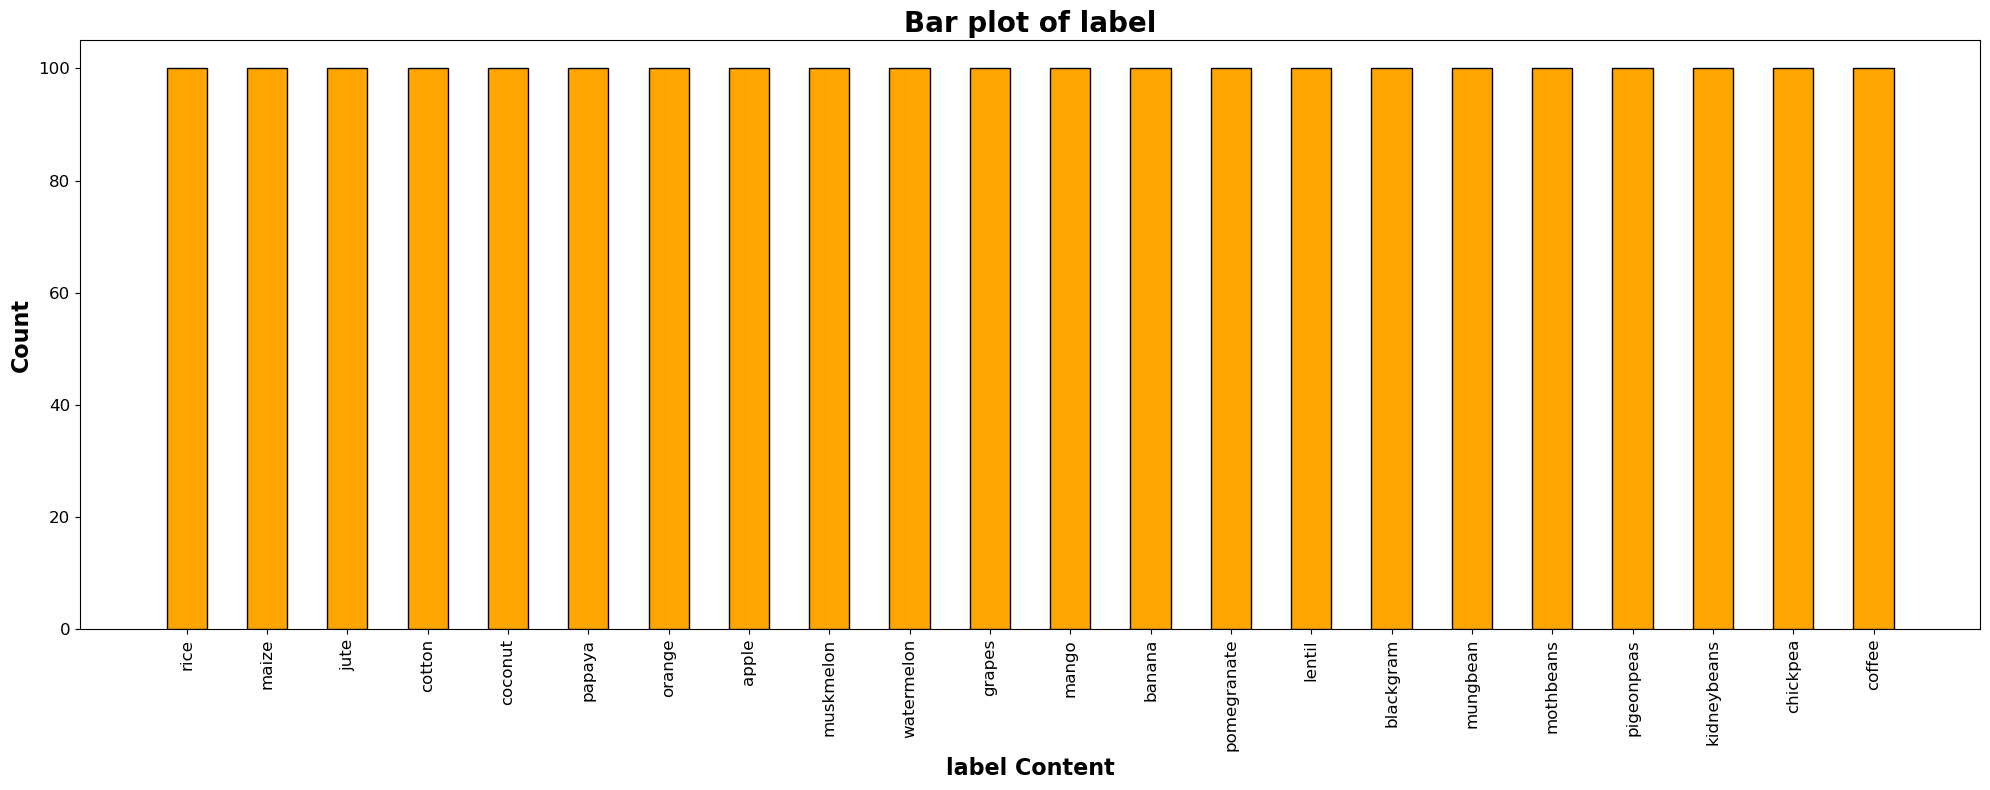

In [31]:
print("--------------------Value Counts--------------------\n")
print(crop["label"].value_counts())

print("\n--------------------Percentage Counts--------------------\n")
print(crop["label"].value_counts(normalize = True) * 100)

print("\n--------------------Number of Unique Entries--------------------\n")
print(crop["label"].nunique())

print("\n--------------------Statistical Summary--------------------\n")
print(crop["label"].describe())


print("\n--------------------Bar Plot-------------------------\n")
plt.figure(figsize = (20, 8), dpi = 100, facecolor = "white", edgecolor = "black")
plt.bar(
    crop["label"].value_counts().index, crop["label"].value_counts().values,
    color = "orange",
    width = 0.5,
    align = "center",
    edgecolor = "black",
    zorder = 3
)
plt.title("Bar plot of label", fontsize = 20, color = "black", loc = "center", fontweight = "bold")
plt.xlabel("label Content", fontweight = "bold", fontsize = 16)
plt.ylabel("Count", fontweight = "bold", fontsize = 16)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12, rotation = 0)
plt.xlim()
plt.tight_layout()
plt.show()

# Bivariate Analysis

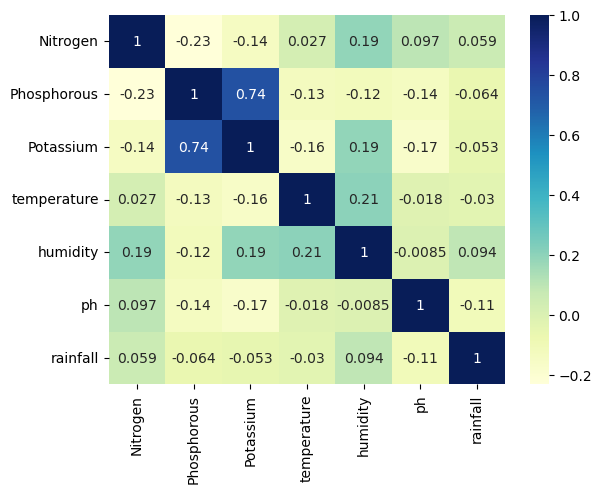

In [33]:
crop_new = crop.drop(columns = "label")

sns.heatmap(crop_new.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [34]:
for column in crop_new.columns.tolist():
    print(f"\nlabel with {column}\n")
    display(crop.groupby("label")[column].describe().reset_index())


label with Nitrogen



,label,count,mean,std,min,25%,50%,75%,max
0,apple,100.0,20.80,11.863704,0.0,10.00,24.0,30.00,40.0
1,banana,100.0,100.23,11.107241,80.0,92.00,100.5,108.25,120.0
2,blackgram,100.0,40.02,12.664258,20.0,28.75,41.0,52.00,60.0
3,chickpea,100.0,40.09,12.150649,20.0,30.00,39.0,52.00,60.0
4,coconut,100.0,21.98,11.761931,0.0,13.75,24.0,31.00,40.0
5,coffee,100.0,101.20,12.345203,80.0,89.00,103.0,112.00,120.0
6,cotton,100.0,117.77,11.628817,100.0,107.75,117.0,127.50,140.0
7,grapes,100.0,23.18,12.466829,0.0,11.75,24.0,35.00,40.0
8,jute,100.0,78.40,10.968274,60.0,70.00,78.0,88.25,100.0
9,kidneybeans,100.0,20.75,10.834266,0.0,11.75,22.0,28.00,40.0



label with Phosphorous



,label,count,mean,std,min,25%,50%,75%,max
0,apple,100.0,134.22,8.139665,120.0,126.75,136.5,141.00,145.0
1,banana,100.0,82.01,7.690339,70.0,75.00,81.0,88.00,95.0
2,blackgram,100.0,67.47,7.151259,55.0,62.00,67.0,74.00,80.0
3,chickpea,100.0,67.79,7.498545,55.0,61.00,68.0,74.00,80.0
4,coconut,100.0,16.93,8.357244,5.0,9.75,15.5,24.25,30.0
5,coffee,100.0,28.74,7.276113,15.0,23.00,29.0,34.25,40.0
6,cotton,100.0,46.24,7.348634,35.0,40.00,46.0,52.00,60.0
7,grapes,100.0,132.53,7.619029,120.0,125.75,133.0,139.00,145.0
8,jute,100.0,46.86,7.195706,35.0,41.00,46.0,53.25,60.0
9,kidneybeans,100.0,67.54,7.571104,55.0,61.00,67.0,74.00,80.0



label with Potassium



,label,count,mean,std,min,25%,50%,75%,max
0,apple,100.0,199.89,3.320871,195.0,197.00,200.0,203.00,205.0
1,banana,100.0,50.05,3.382591,45.0,47.00,50.0,53.00,55.0
2,blackgram,100.0,19.24,3.188109,15.0,16.75,19.0,22.00,25.0
3,chickpea,100.0,79.92,3.261901,75.0,77.00,79.0,83.00,85.0
4,coconut,100.0,30.59,2.998636,25.0,29.00,31.0,33.00,35.0
5,coffee,100.0,29.94,3.246817,25.0,27.00,30.0,33.00,35.0
6,cotton,100.0,19.56,3.169680,15.0,17.00,19.0,22.00,25.0
7,grapes,100.0,200.11,3.265662,195.0,197.00,201.0,203.00,205.0
8,jute,100.0,39.99,3.313563,35.0,37.00,40.0,43.00,45.0
9,kidneybeans,100.0,20.05,3.102215,15.0,17.00,20.0,22.25,25.0



label with temperature



,label,count,mean,std,min,25%,50%,75%,max
0,apple,100.0,22.630942,0.827404,21.036527,22.163206,22.628290,23.344066,23.996862
1,banana,100.0,27.376798,1.428359,25.010185,26.108408,27.443333,28.657735,29.908885
2,blackgram,100.0,29.973340,2.686357,25.097374,27.822763,29.655515,32.379701,34.946616
3,chickpea,100.0,18.872847,1.169838,17.024985,17.877953,18.878291,19.711637,20.995022
4,coconut,100.0,27.409892,1.385734,25.008724,26.268718,27.385317,28.600213,29.869083
5,coffee,100.0,25.540477,1.502635,23.059519,24.218563,25.656643,26.744956,27.923744
6,cotton,100.0,23.988958,1.135681,22.000851,23.017615,23.964997,24.973735,25.992374
7,grapes,100.0,23.849575,9.738649,8.825675,16.206523,23.018528,30.823648,41.948657
8,jute,100.0,24.958376,1.185138,23.094338,23.886729,24.971106,25.894852,26.985822
9,kidneybeans,100.0,20.115085,2.599573,15.330426,18.294621,19.924037,22.003187,24.923601



label with humidity



,label,count,mean,std,min,25%,50%,75%,max
0,apple,100.0,92.333383,1.458551,90.025751,90.970127,92.416541,93.509252,94.920481
1,banana,100.0,80.358123,2.805481,75.031933,78.062229,80.223599,82.960240,84.978492
2,blackgram,100.0,65.118426,2.798326,60.065349,63.040532,65.026723,67.741171,69.961000
3,chickpea,100.0,16.860439,1.711979,14.258040,15.392700,16.658634,18.265986,19.969789
4,coconut,100.0,94.844272,2.686329,90.017345,92.544995,94.960581,96.759684,99.981876
5,coffee,100.0,58.869846,5.838566,50.045570,53.814433,57.648083,63.579586,69.948073
6,cotton,100.0,79.843474,3.050955,75.005393,77.035008,80.010893,82.364946,84.876690
7,grapes,100.0,81.875228,1.177111,80.016394,80.859457,81.724647,82.899224,83.983517
8,jute,100.0,79.639864,5.507798,70.882596,74.588266,79.469205,83.232826,89.891065
9,kidneybeans,100.0,21.605357,2.167323,18.092240,19.735894,21.348735,23.357184,24.969699



label with ph



,label,count,mean,std,min,25%,50%,75%,max
0,apple,100.0,5.929663,0.268932,5.514253,5.705800,5.885818,6.135616,6.499227
1,banana,100.0,5.983893,0.270650,5.505394,5.740712,5.994462,6.211092,6.490074
2,blackgram,100.0,7.133952,0.372533,6.500145,6.812736,7.165240,7.419390,7.775306
3,chickpea,100.0,7.336957,0.801127,5.988993,6.603967,7.356537,7.861625,8.868741
4,coconut,100.0,5.976562,0.287632,5.501580,5.731053,5.990709,6.209201,6.470466
5,coffee,100.0,6.790308,0.417132,6.020947,6.429728,6.798626,7.132105,7.493192
6,cotton,100.0,6.912675,0.627170,5.801048,6.364399,6.840957,7.426792,7.994680
7,grapes,100.0,6.025937,0.298265,5.510925,5.776854,6.001785,6.313711,6.499605
8,jute,100.0,6.732778,0.446349,6.002525,6.348010,6.711500,7.126526,7.488014
9,kidneybeans,100.0,5.749411,0.145220,5.502999,5.624995,5.745283,5.868351,5.998125



label with rainfall



,label,count,mean,std,min,25%,50%,75%,max
0,apple,100.0,112.654779,7.102985,100.117344,106.070135,112.979230,118.449546,124.983162
1,banana,100.0,104.626980,9.398150,90.109781,96.471109,105.007750,112.092171,119.847970
2,blackgram,100.0,67.884151,4.184186,60.417903,64.049755,68.293539,71.397924,74.915595
3,chickpea,100.0,80.058977,7.944350,65.113656,73.610409,79.692282,85.824482,94.781896
4,coconut,100.0,175.686646,29.472333,131.090008,149.126478,171.999922,202.351490,225.632366
5,coffee,100.0,158.066295,25.695086,115.156401,136.011746,157.770963,181.472018,199.473564
6,cotton,100.0,80.398043,11.231812,60.653817,70.894298,80.237095,90.418270,99.931008
7,grapes,100.0,69.611829,2.951759,65.010953,66.836826,69.536186,71.609366,74.915062
8,jute,100.0,174.792798,15.078367,150.235524,161.090683,175.590814,187.641532,199.836291
9,kidneybeans,100.0,105.919778,26.111384,60.275525,85.824741,107.399392,129.399964,149.744103


# Outlier Handling

Nitrogen: 0.5097213691539147


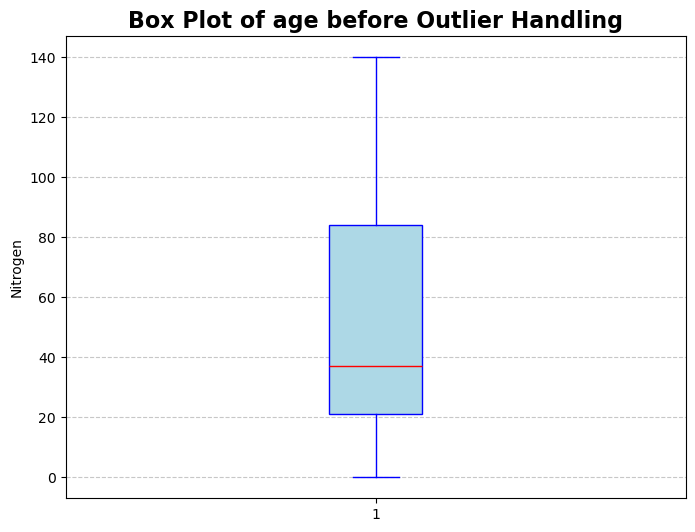

Phosphorous: 1.0107725431372674


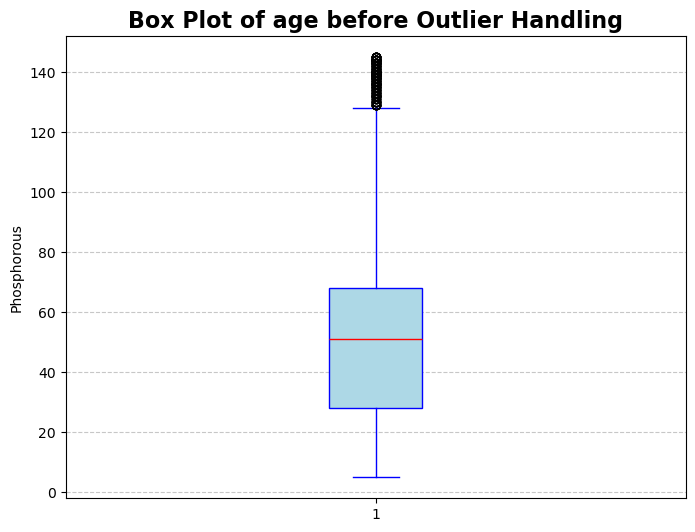

Potassium: 2.3751672388547


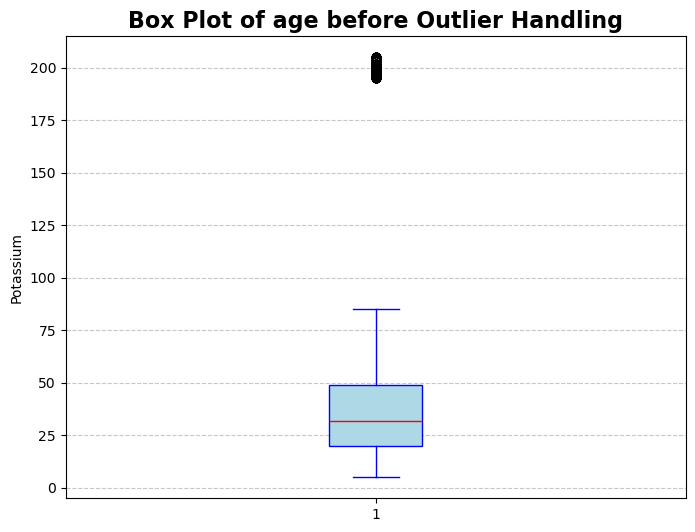

temperature: 0.18493273421137887


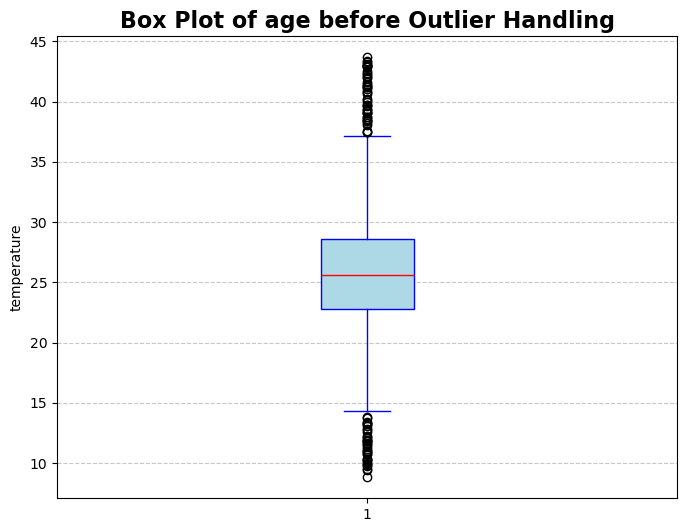

humidity: -1.0917079195808679


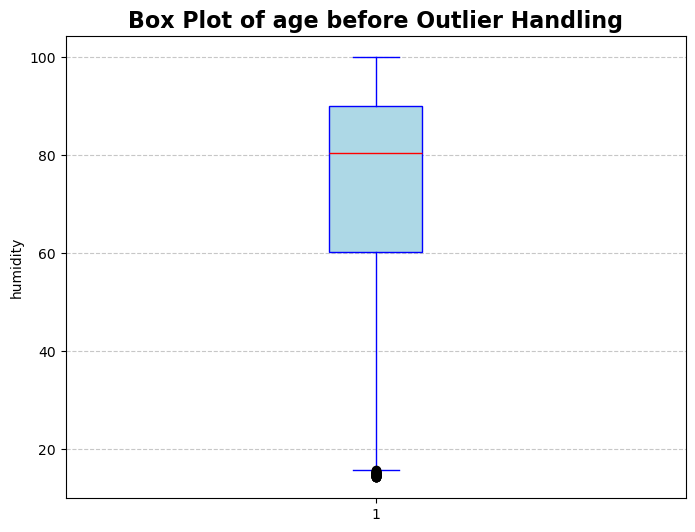

ph: 0.2839294375729441


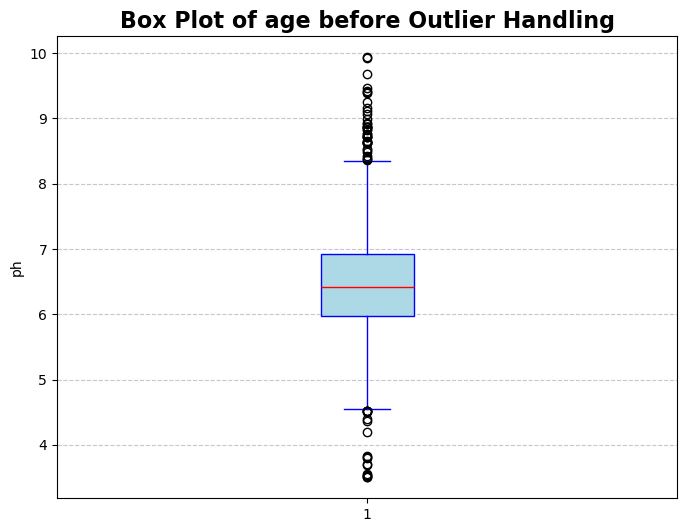

rainfall: 0.9657563536272812


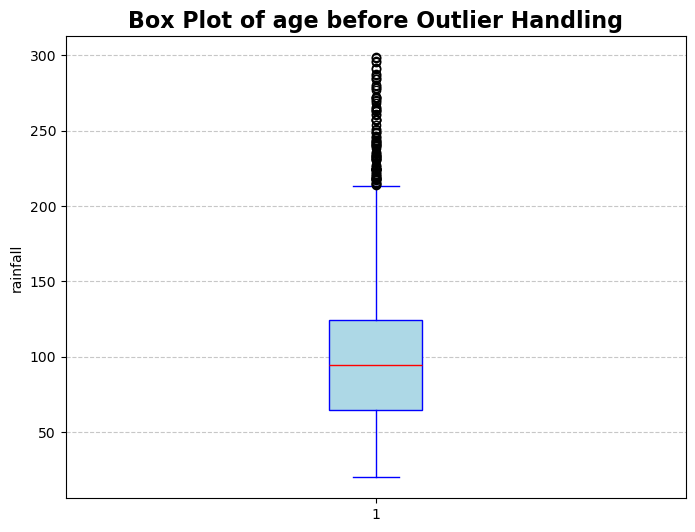

In [36]:
for column in crop_new.columns.tolist():
    print(f"{column}: {crop[column].skew()}")
    plt.figure(figsize = (8, 6), dpi = 100, facecolor = "white", edgecolor = "black")
    plt.boxplot(
        crop[column],
        vert = True,
        patch_artist = True,
        boxprops=dict(facecolor="lightblue", color="blue"),
        medianprops=dict(color="red"),
        whiskerprops=dict(color="blue"),
        capprops=dict(color="blue")
    )
    plt.title("Box Plot of age before Outlier Handling", fontsize = 16, fontweight = "bold", color = "black")
    plt.ylabel(column)
    plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
    plt.show()

In [37]:
for column in crop_new.columns.tolist():
    Q1 = np.percentile(crop[column], 25)
    Q3 = np.percentile(crop[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    crop.loc[(crop[column] < lower_bound) | (crop[column] > upper_bound), column] = crop[column].median()

Nitrogen: 0.5097213691539147


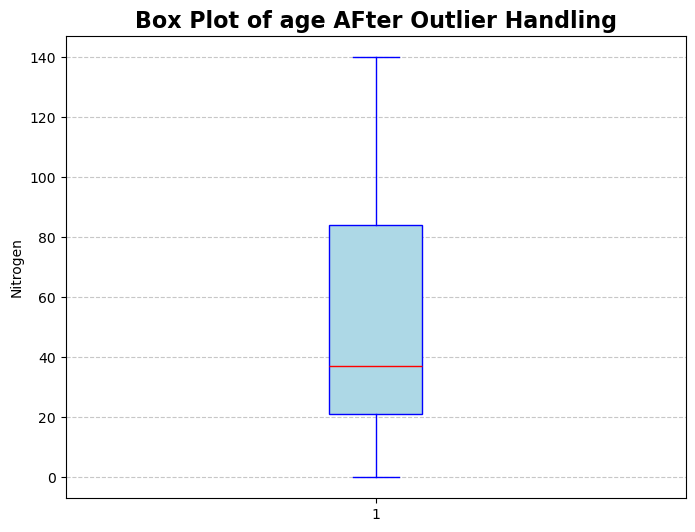

Phosphorous: 0.5416276272746203


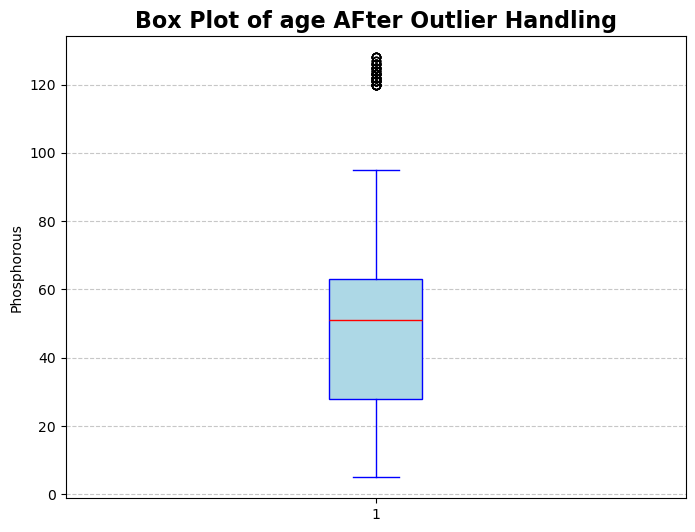

Potassium: 1.060436320835563


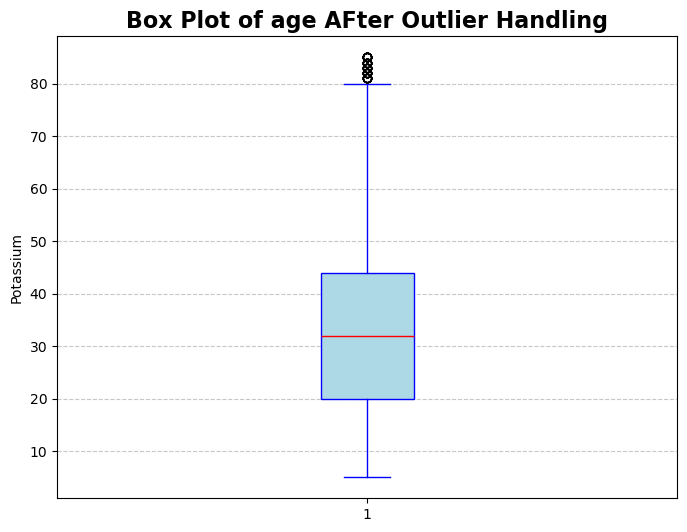

temperature: 0.029431334199612483


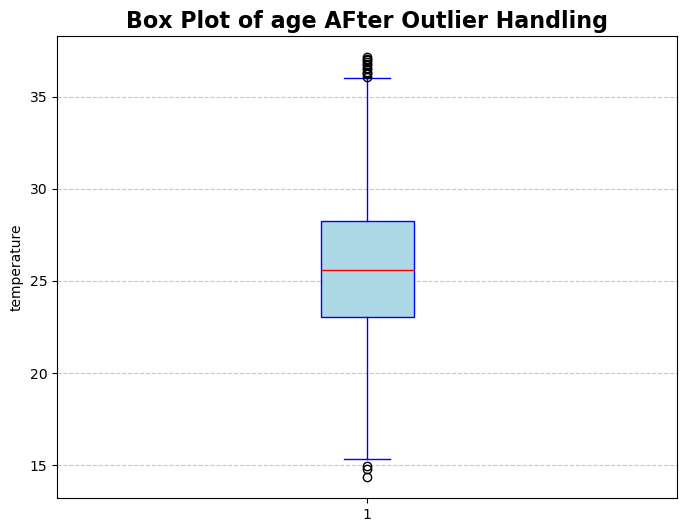

humidity: -1.1204570842825299


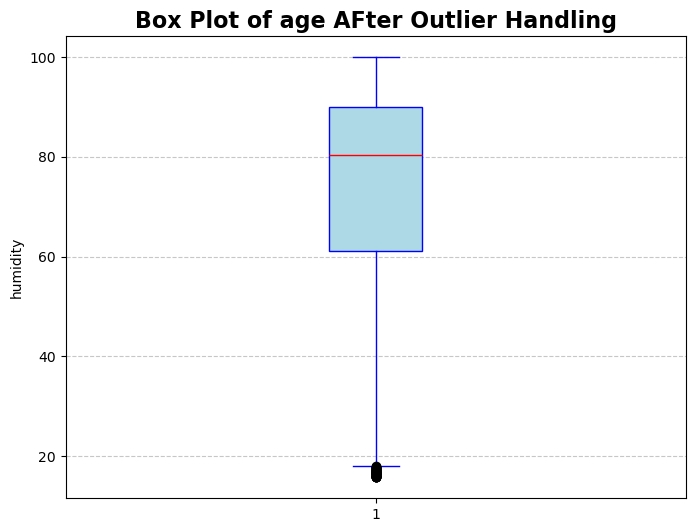

ph: 0.07033122281264265


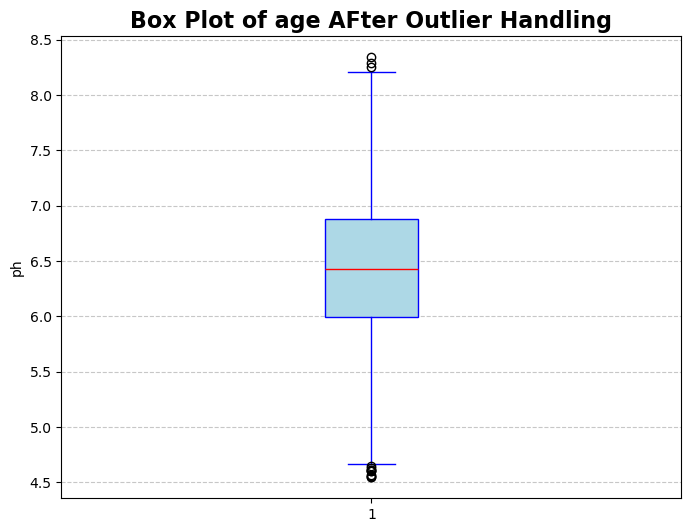

rainfall: 0.6395808897755971


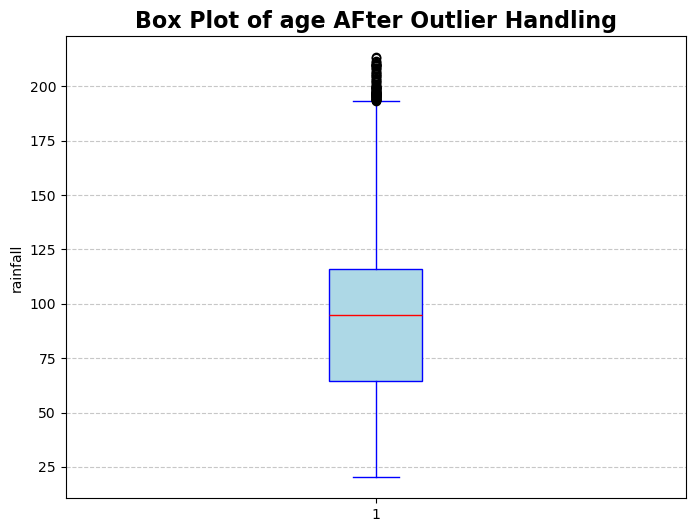

In [38]:
for column in crop_new.columns.tolist():
    print(f"{column}: {crop[column].skew()}")
    plt.figure(figsize = (8, 6), dpi = 100, facecolor = "white", edgecolor = "black")
    plt.boxplot(
        crop[column],
        vert = True,
        patch_artist = True,
        boxprops=dict(facecolor="lightblue", color="blue"),
        medianprops=dict(color="red"),
        whiskerprops=dict(color="blue"),
        capprops=dict(color="blue")
    )
    plt.title("Box Plot of age AFter Outlier Handling", fontsize = 16, fontweight = "bold", color = "black")
    plt.ylabel(column)
    plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
    plt.show()

In [39]:
for column in crop_new.columns.tolist():
    Q1 = np.percentile(crop[column], 25)
    Q3 = np.percentile(crop[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    crop.loc[(crop[column] < lower_bound) | (crop[column] > upper_bound), column] = crop[column].median()

Nitrogen: 0.5097213691539147


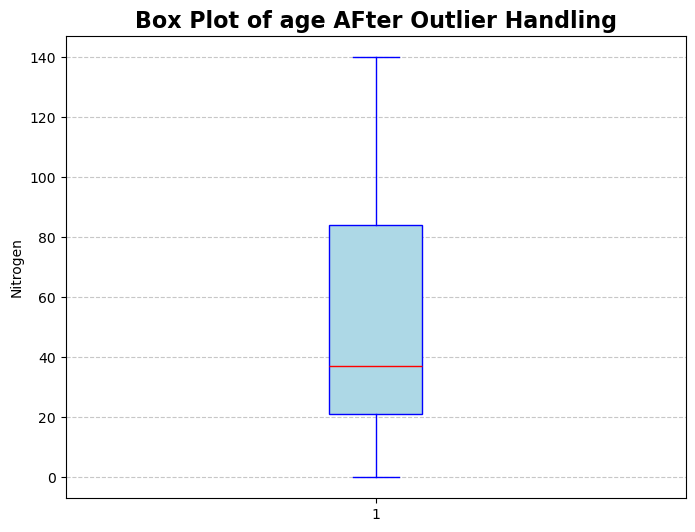

Phosphorous: -0.1372316911607231


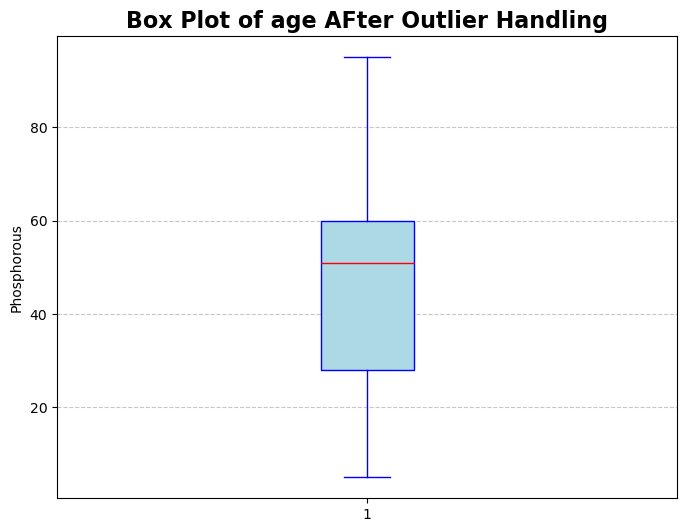

Potassium: 0.8326869758788036


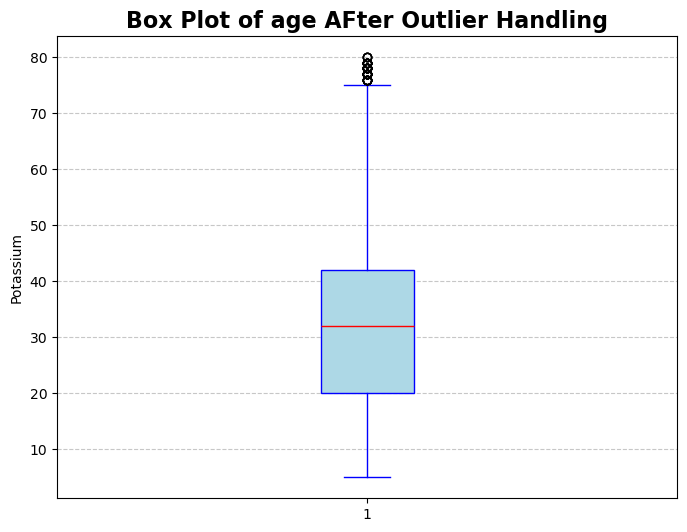

temperature: -0.021263246747596144


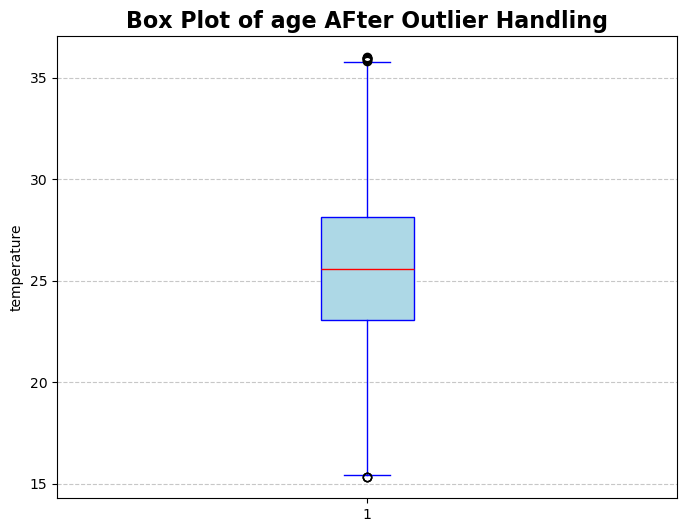

humidity: -1.1442978662759142


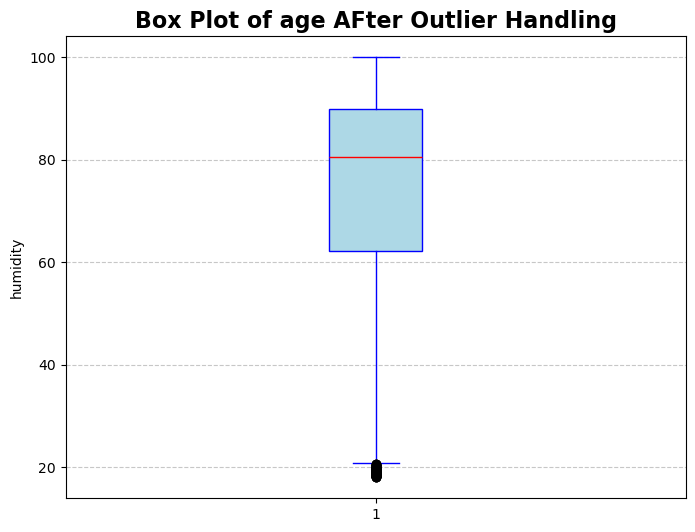

ph: 0.1235653837116715


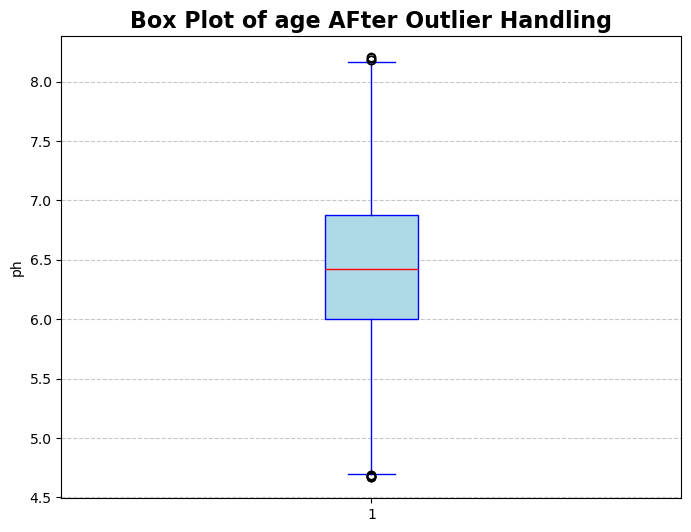

rainfall: 0.5509416586947791


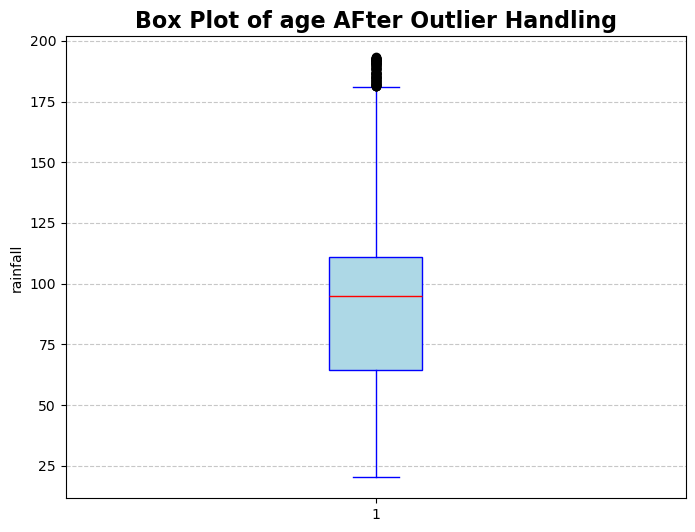

In [40]:
for column in crop_new.columns.tolist():
    print(f"{column}: {crop[column].skew()}")
    plt.figure(figsize = (8, 6), dpi = 100, facecolor = "white", edgecolor = "black")
    plt.boxplot(
        crop[column],
        vert = True,
        patch_artist = True,
        boxprops=dict(facecolor="lightblue", color="blue"),
        medianprops=dict(color="red"),
        whiskerprops=dict(color="blue"),
        capprops=dict(color="blue")
    )
    plt.title("Box Plot of age AFter Outlier Handling", fontsize = 16, fontweight = "bold", color = "black")
    plt.ylabel(column)
    plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
    plt.show()

In [41]:
for column in crop_new.columns.tolist():
    Q1 = np.percentile(crop[column], 25)
    Q3 = np.percentile(crop[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    crop.loc[(crop[column] < lower_bound) | (crop[column] > upper_bound), column] = crop[column].median()

Nitrogen: 0.5097213691539147


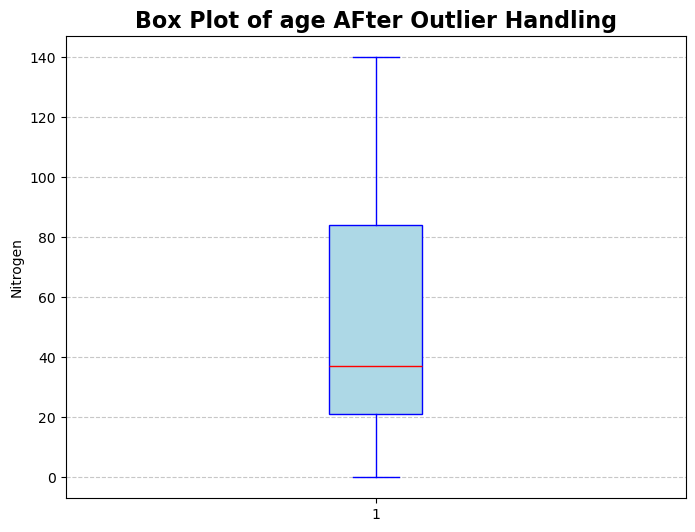

Phosphorous: -0.1372316911607231


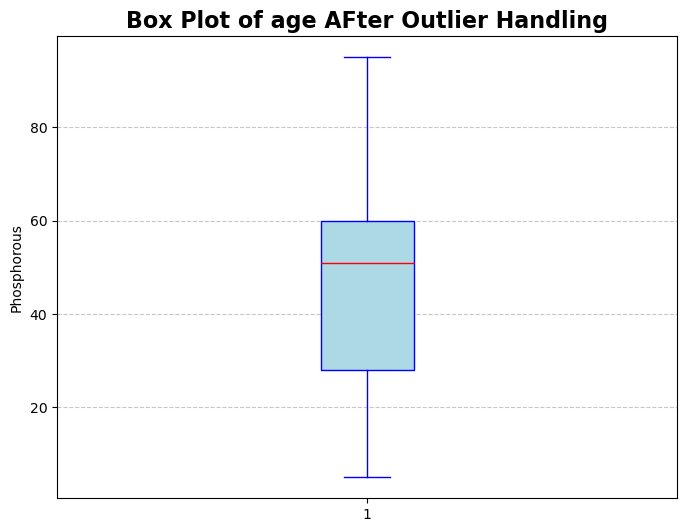

Potassium: 0.4082714646554265


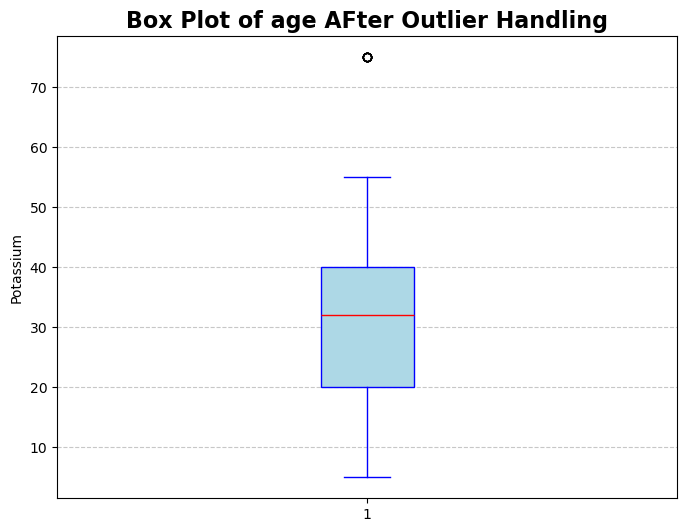

temperature: -0.04275804117008872


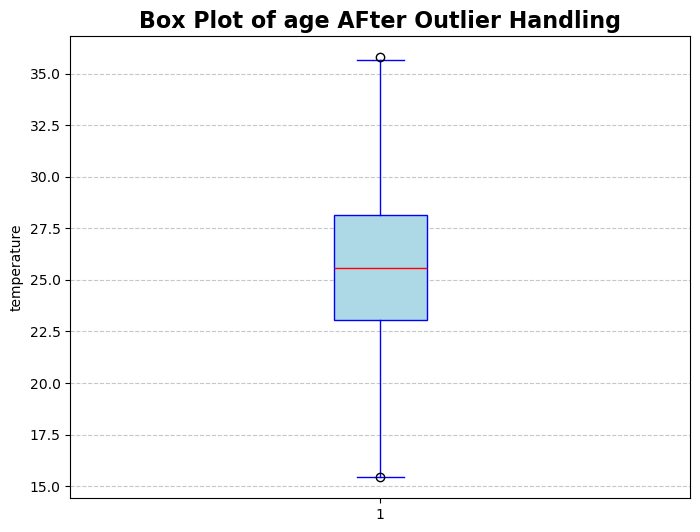

humidity: -1.0918617875100294


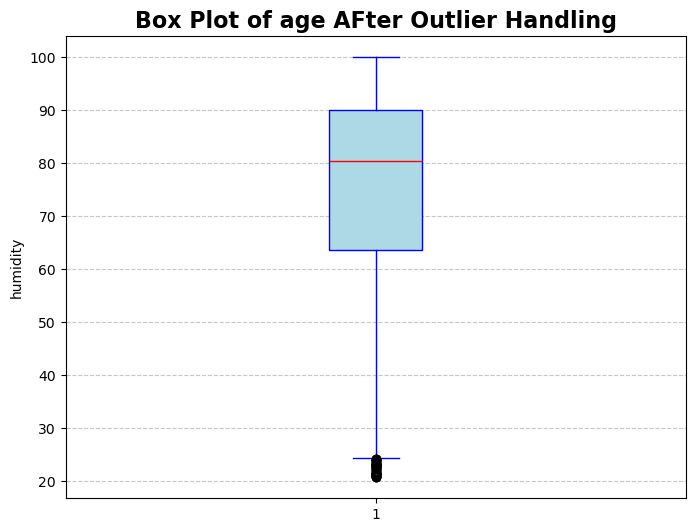

ph: 0.14435702323455216


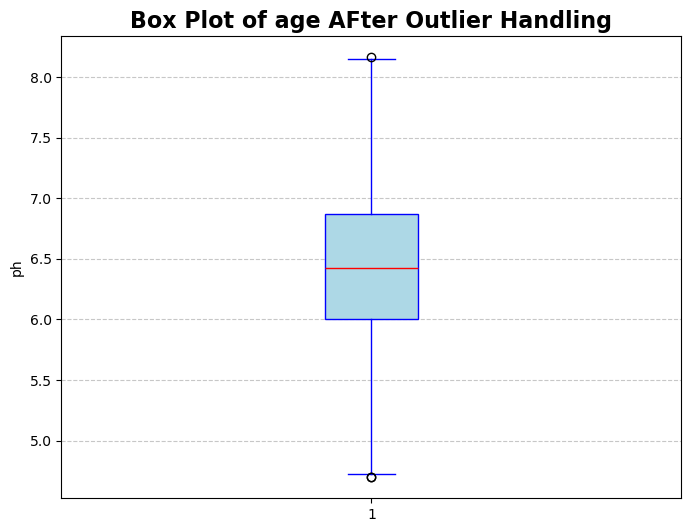

rainfall: 0.3683620090893672


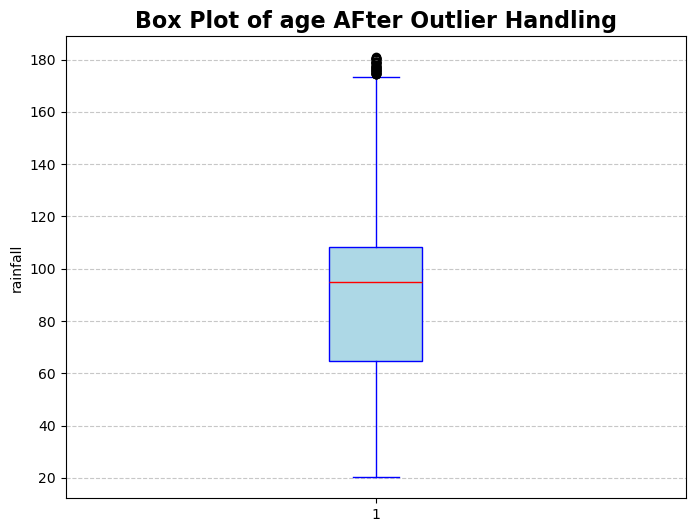

In [42]:
for column in crop_new.columns.tolist():
    print(f"{column}: {crop[column].skew()}")
    plt.figure(figsize = (8, 6), dpi = 100, facecolor = "white", edgecolor = "black")
    plt.boxplot(
        crop[column],
        vert = True,
        patch_artist = True,
        boxprops=dict(facecolor="lightblue", color="blue"),
        medianprops=dict(color="red"),
        whiskerprops=dict(color="blue"),
        capprops=dict(color="blue")
    )
    plt.title("Box Plot of age AFter Outlier Handling", fontsize = 16, fontweight = "bold", color = "black")
    plt.ylabel(column)
    plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
    plt.show()

In [43]:
for column in crop_new.columns.tolist():
    Q1 = np.percentile(crop[column], 25)
    Q3 = np.percentile(crop[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    crop.loc[(crop[column] < lower_bound) | (crop[column] > upper_bound), column] = crop[column].median()

Nitrogen: 0.5097213691539147


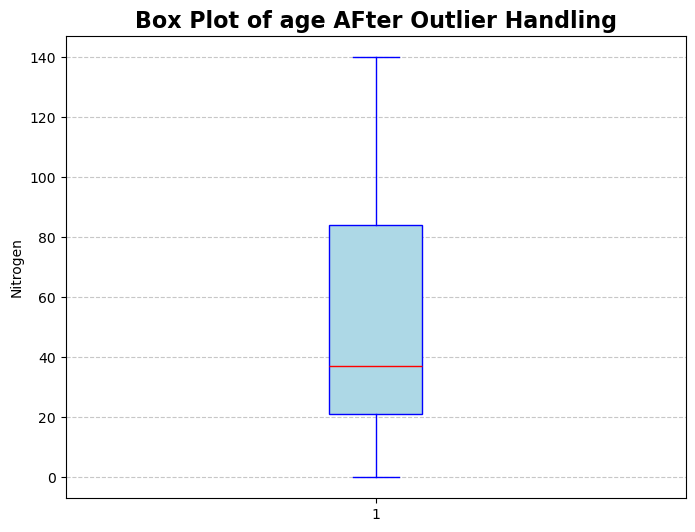

Phosphorous: -0.1372316911607231


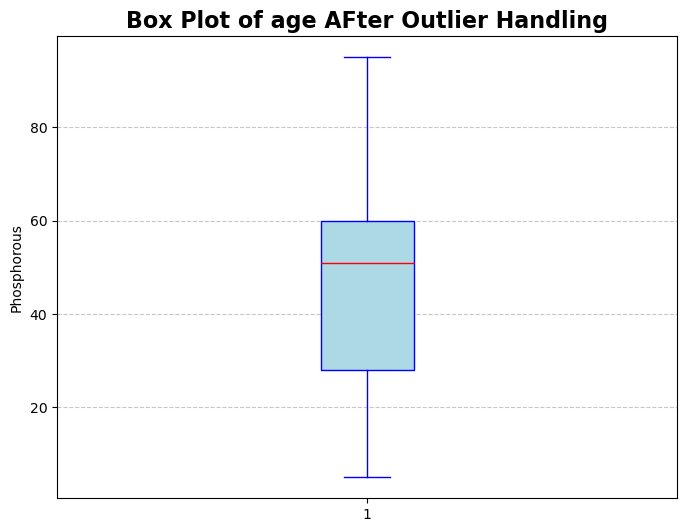

Potassium: 0.3075820759024923


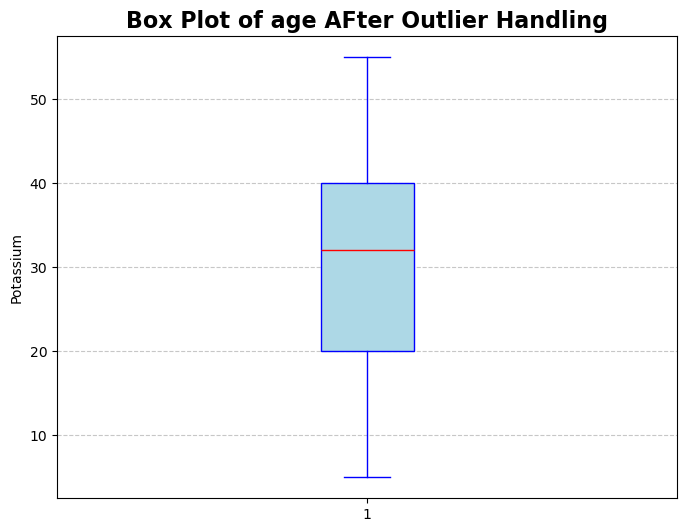

temperature: -0.04377450991591512


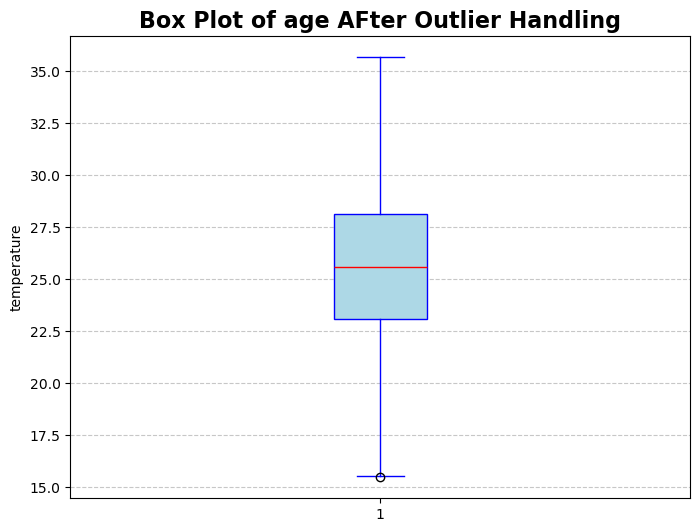

humidity: -0.9292106171700646


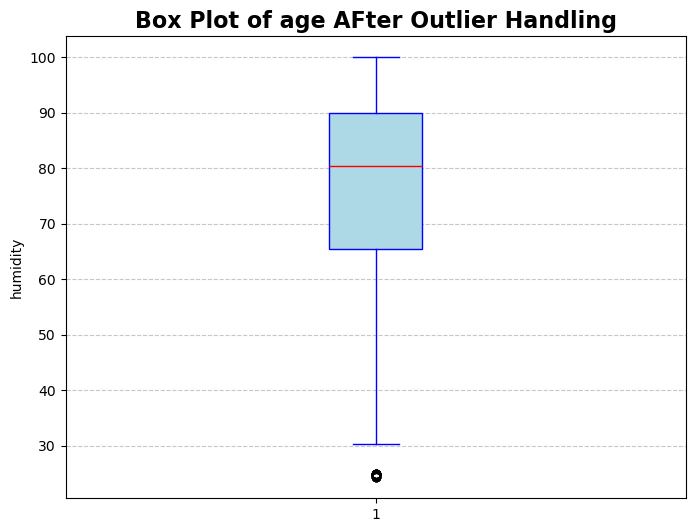

ph: 0.15329114485824233


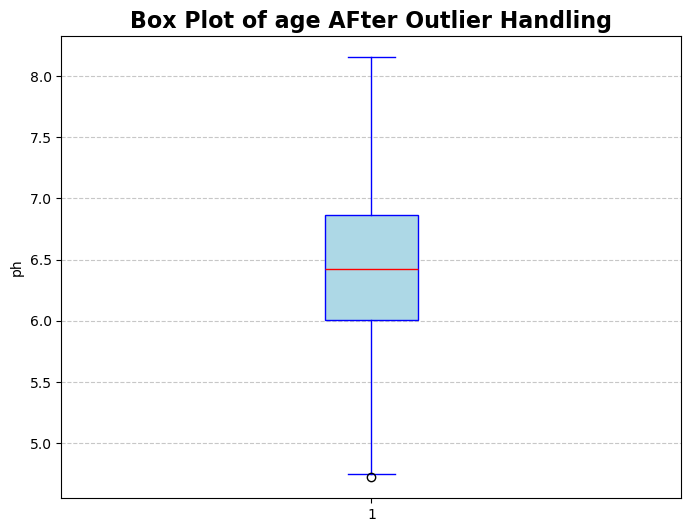

rainfall: 0.23737977624958062


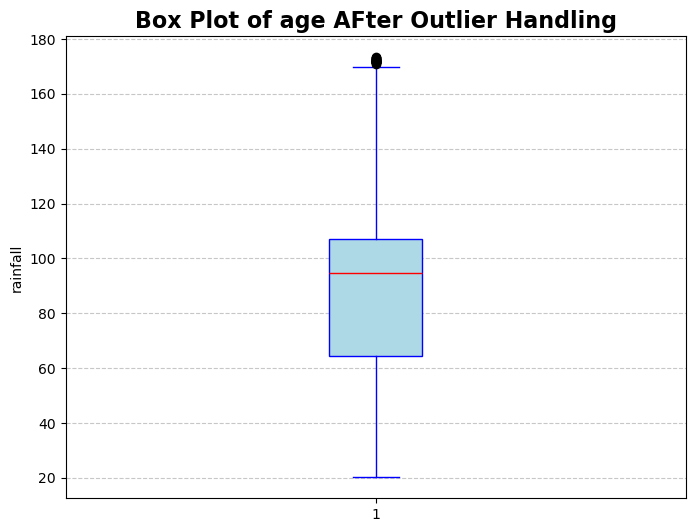

In [44]:
for column in crop_new.columns.tolist():
    print(f"{column}: {crop[column].skew()}")
    plt.figure(figsize = (8, 6), dpi = 100, facecolor = "white", edgecolor = "black")
    plt.boxplot(
        crop[column],
        vert = True,
        patch_artist = True,
        boxprops=dict(facecolor="lightblue", color="blue"),
        medianprops=dict(color="red"),
        whiskerprops=dict(color="blue"),
        capprops=dict(color="blue")
    )
    plt.title("Box Plot of age AFter Outlier Handling", fontsize = 16, fontweight = "bold", color = "black")
    plt.ylabel(column)
    plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
    plt.show()

In [45]:
crop

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,94.824760,rice
1,85,58,41,21.770462,80.319644,7.038096,94.867624,rice
2,60,55,44,23.004459,82.320763,7.840207,94.867624,rice
3,74,35,40,26.491096,80.158363,6.980401,94.867624,rice
4,78,42,42,20.130175,81.604873,7.628473,94.867624,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,94.792612,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# Encoding

In [47]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=  crop['label'].map(crop_dict)

In [48]:
crop

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,94.824760,rice,1
1,85,58,41,21.770462,80.319644,7.038096,94.867624,rice,1
2,60,55,44,23.004459,82.320763,7.840207,94.867624,rice,1
3,74,35,40,26.491096,80.158363,6.980401,94.867624,rice,1
4,78,42,42,20.130175,81.604873,7.628473,94.867624,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,94.792612,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


In [49]:
crop.drop(['label'],axis=1,inplace=True)
crop.head()

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,94.824760,1
1,85,58,41,21.770462,80.319644,7.038096,94.867624,1
2,60,55,44,23.004459,82.320763,7.840207,94.867624,1
3,74,35,40,26.491096,80.158363,6.980401,94.867624,1
4,78,42,42,20.130175,81.604873,7.628473,94.867624,1


# Train Test Split

In [51]:
X = crop.drop(['crop_num'],axis=1)
y = crop['crop_num']

In [52]:
X

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,94.824760
1,85,58,41,21.770462,80.319644,7.038096,94.867624
2,60,55,44,23.004459,82.320763,7.840207,94.867624
3,74,35,40,26.491096,80.158363,6.980401,94.867624
4,78,42,42,20.130175,81.604873,7.628473,94.867624
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,94.792612
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [53]:
y

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: crop_num, Length: 2200, dtype: int64

In [54]:
y.shape

(2200,)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X_train

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,51,32,25.598693,80.066340,6.361141,71.400430



# Scale the features using MinMaxScaler

In [59]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [60]:
X_train

array([[0.12142857, 0.12222222, 0.18      , ..., 0.89689154, 0.55477322,
        0.53989686],
       [0.26428571, 0.82222222, 0.28      , ..., 0.5950665 , 0.70587618,
        0.32065811],
       [0.05      , 0.75555556, 0.4       , ..., 0.51290457, 0.74788208,
        0.16244731],
       ...,
       [0.07857143, 0.34444444, 0.52      , ..., 0.36284245, 0.5110256 ,
        0.52233969],
       [0.07857143, 0.51111111, 0.54      , ..., 0.73674791, 0.47770737,
        0.33367858],
       [0.22857143, 0.81111111, 0.34      , ..., 0.50263945, 0.66597142,
        0.21605935]])

# Training Models

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, model in models.items():
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")
    print("Confusion matrix : ",confusion_matrix(y_test,ypred))
    print("==========================================================")
    

Logistic Regression  with accuracy : 0.9204545454545454
Confusion matrix :  [[10  0  6  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0 20  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  

In [63]:
# finally selected randomforest model

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.990909090909091

In [64]:
# or gausianjb
gnb = GaussianNB()
gnb.fit(X_train,y_train)
ypred = gnb.predict(X_test)
accuracy_score(y_test,ypred)

0.990909090909091

# Predictive System

In [66]:
def recommendation(Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfal):
    features = np.array([[Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfal]])
    transformed_features = ms.fit_transform(features)
    prediction = rfc.predict(transformed_features)
    print(prediction)
    return prediction[0]

In [67]:
# new inputs
Nitrogen = 40
Phosphorous = 50
Potassium = 50
temperature = 40.0
humidity = 20
ph = 100
rainfall = 100

predict = recommendation(Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict in crop_dict:
    crop = crop_dict[predict]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

[18]
Mothbeans is a best crop to be cultivated 


In [68]:
# new inputs 2


Nitrogen = 100
Phosphorous = 90
Potassium = 100
temperature = 50.0
humidity = 90.0
ph = 100
rainfall = 202.0

predict = recommendation(Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict in crop_dict:
    crop = crop_dict[predict]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

[18]
Mothbeans is a best crop to be cultivated 


In [69]:
# new inputs 2
Nitrogen = 10
Phosphorous = 15
Potassium = 10
temperature = 15.0
humidity = 10.0
ph = 10.0
rainfall = 10.0

predict = recommendation(Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict in crop_dict:
    crop = crop_dict[predict]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

[18]
Mothbeans is a best crop to be cultivated 


In [70]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(ms,open('standscaler.pkl','wb'))